## **Business Problem Understanding**

### **Context**
Sebuah bank di Portugal menjalankan kampanye pemasaran melalui **telemarketing** untuk menawarkan **produk deposito berjangka (*term deposit*)**. Dalam kampanye ini, nasabah dihubungi satu per satu melalui panggilan telepon untuk menerima penawaran produk.

Namun, salah satu tantangan utama adalah **tingginya biaya operasional** akibat durasi panggilan yang panjang, terutama ketika dilakukan dalam skala besar. Meskipun panggilan telemarketing penting untuk menjangkau semua nasabah, **tidak semua interaksi berujung pada pembukaan deposito**, sehingga waktu dan biaya bisa terbuang sia-sia.

Selama kampanye berlangsung, berbagai data dikumpulkan, seperti:

1. Profil nasabah (umur, pekerjaan, status kredit, dll.)

2. Riwayat kampanye sebelumnya

3. Durasi panggilan (`duration`)

4. Biaya estimasi panggilan (`call_fee`)

Variabel `duration` terbukti memiliki **korelasi kuat dengan hasil kampanye (`y`)**, dan dapat digunakan untuk menyusun **strategi efisiensi durasi**, tanpa harus mengorbankan cakupan nasabah.

Perusahaan ingin mengetahui bagaimana durasi percakapan dapat dimanfaatkan secara **efisien** agar:

1. Tidak membuang biaya untuk nasabah yang tidak tertarik,

2. Tapi tetap mengoptimalkan konversi pada nasabah yang potensial membuka deposito.

Target
* `y = "no"`: Nasabah **tidak membuka** deposito
* `y = "yes"`: Nasabah **membuka deposito**

### **Problem Statement**
Bank tetap ingin **menghubungi seluruh nasabah,** namun menghadapi risiko:

1. **Durasi panggilan yang terlalu panjang** pada nasabah yang tidak tertarik

2. **Pemborosan biaya komunikasi** dan beban waktu bagi agen telemarketing

Oleh karena itu, perlu diterapkan strategi **cut-off durasi** (`duration_cut_off`) yang optimal, yaitu batas waktu maksimal percakapan berdasarkan hasil historis dan potensi konversi nasabah.

#### **Berdasarkan hasil analisis data:**

1. **Total biaya aktual (tanpa cut-off):** €45.359,00

2. **Total biaya setelah cut-off:** €24.857,60

3. **Penghematan biaya: €20.501,40 (45%)**

#### **Selain itu, dari sisi waktu:**

1. **Total durasi aktual panggilan:** 10.638.243 detik (**177.304 menit**)

2. **Total durasi setelah cut-off:** 5.991.325 detik (**99.855 menit**)

3. **Penghematan waktu: 4.646.918 detik** (**77.448 menit) (43,68%)**

Sama dengan **1.290 jam telepon**, atau hampir **161 hari kerja agen** (8 jam per hari)

### **Goals**
Proyek ini bertujuan untuk:

1. **Meningkatkan efisiensi kampanye telemarketing** tanpa mengorbankan jangkauan nasabah

2. **Menetapkan batas durasi optimal** (`duration_cut_off`) berdasarkan data historis

3. **Menghemat biaya dan waktu** melalui strategi cut-off, khususnya pada nasabah yang tidak tertarik

4. Membangun **model prediktif** untuk membantu mengenali nasabah yang potensial membuka deposito (`y = "yes"`)

### **Analytic Approach**
Pendekatan yang dilakukan meliputi:

1. **Analisis eksploratif** terhadap variabel-variabel yang berkorelasi dengan konversi (`y`)

2. Penambahan fitur biaya (`call_fee`) dan `duration_cut_off` sebagai strategi efisiensi

3. Penerapan **model machine learning** untuk memprediksi apakah nasabah akan membuka deposito

4. Evaluasi strategi cut-off dalam menurunkan biaya dan durasi panggilan

### **Metric Evaluation**

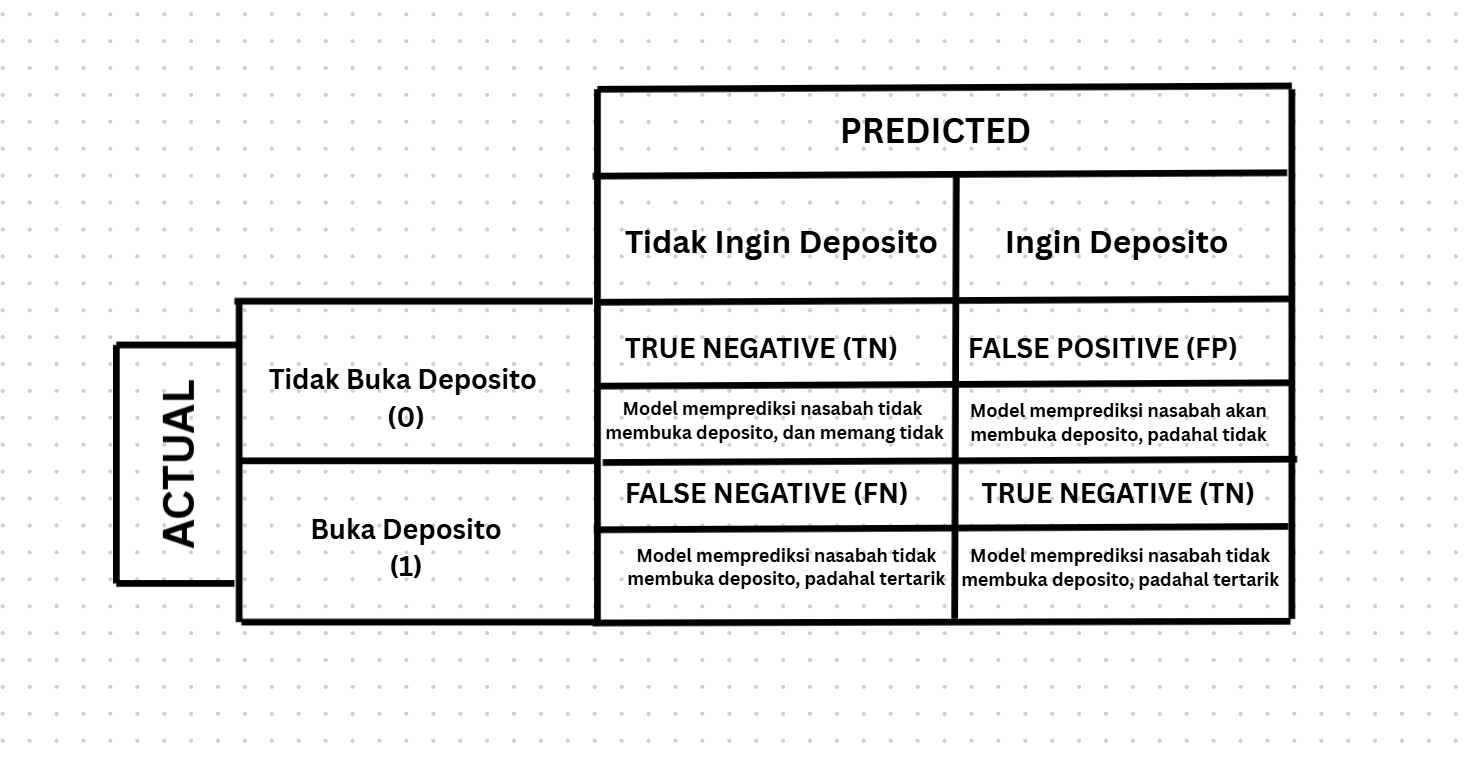

|                                     | **PREDICTED: Tidak buka deposito (0)**                                                               | **PREDICTED: Buka deposito (1)**                                                              |
| ----------------------------------- | ---------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **ACTUAL: Tidak buka deposito (0)** | **True Negative (TN)**<br>Model memprediksi nasabah tidak membuka deposito, dan memang tidak membuka | **False Positive (FP)**<br>Model memprediksi nasabah akan membuka deposito, padahal tidak     |
| **ACTUAL: Buka deposito (1)**       | **False Negative (FN)**<br>Model memprediksi nasabah tidak membuka deposito, padahal tertarik        | **True Positive (TP)**<br>Model memprediksi nasabah akan membuka deposito, dan memang membuka |


#### **Error Analysis**
Type 1 Error (False Positive)

❗ Model bilang nasabah akan tertarik, tapi ternyata tidak.

💸 Konsekuensi: Biaya telepon terbuang sia-sia, waktu agent habis, pulsa & tenaga terbuang.

Type 2 Error (False Negative)

❗ Model bilang nasabah tidak tertarik, padahal sebenarnya tertarik.

📉 Konsekuensi: Kehilangan nasabah potensial yang seharusnya bisa buka deposito → rugi peluang bisnis.

#### **Trade-off & Strategi**

Berdasarkan konsekuensinya:

1. Kita **tidak ingin terlalu banyak False Positives** → buang biaya

2. Tapi juga **tidak boleh terlalu banyak False Negatives** → kehilangan target prospek

Artinya, model perlu seimbang:

1. **Precision tinggi** → agar prediksi `ya` benar-benar akurat

2. **Recall tinggi** → agar tidak melewatkan nasabah potensial

#### **Metrik Evaluasi Utama**

Karena target `y` bersifat biner (`"yes"` / `"no"`), model akan dievaluasi menggunakan:

1. **Precision**: Untuk menghindari menyasar nasabah yang tidak tertarik (biaya sia-sia)

2. **Recall**: Untuk tidak melewatkan nasabah potensial

3. **F1-score**: Keseimbangan antara precision dan recall

4. **PR Curve & ROC AUC**: Khususnya karena data bersifat **imbalanced**

#### **Risiko yang harus dihindari:**

1. **False Positive** → Biaya percakapan terbuang (salah prediksi ya)

2. **False Negative** → Peluang konversi hilang (salah prediksi tidak)

#### **Kesimpulan**
Untuk kampanye telemarketing deposito:

Kita butuh model klasifikasi yang dapat **mengenali nasabah potensial** membuka deposito, **sambil menekan jumlah telepon yang sia-sia**.

## **Data Understanding**

### **Sumber Data**

Sumber data
1. Tautan: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/code
2. Judul: ***Bank marketing campaigns dataset | Opening Deposit***

Note:
1. **Dataset bersifat imbalanced**

    * Target `y` didominasi oleh label `"no"` (nasabah tidak membuka deposito)

    * Hanya sebagian kecil data yang memiliki label `"yes"`

    * Implikasi: perlu teknik penanganan imbalance dalam modeling (misalnya oversampling, undersampling, atau penyesuaian metrik evaluasi)

2. **Fitur dominan kategorikal**

    * Banyak fitur berupa data kategorikal:

        * **Nominal**: `job`, `contact`, `education`, `marital`, `poutcome`

        * **Ordinal (berurutan)**: `month`, `day_of_week`

    * Perlu proses encoding yang sesuai, misalnya one-hot encoding atau ordinal encoding

3. Fitur numerik merepresentasikan intensitas kampanye

    * Contoh:

        * `campaign`: jumlah kontak selama kampanye ini

        * `pdays`: hari sejak terakhir dihubungi

        * `previous`: jumlah kontak pada kampanye sebelumnya

    * Dapat digunakan untuk mengukur "ketekunan" dalam kampanye pemasaran

4. **Setiap baris merepresentasikan 1 interaksi telemarketing**

    * Unit observasi adalah **panggilan telepon per nasabah**

    * Berarti nasabah bisa saja dihubungi lebih dari satu kali

5. **Fitur `duration` mengandung informasi pasca-panggilan**

    * Durasi panggilan hanya diketahui **setelah** panggilan terjadi

    * Oleh karena itu, **tidak boleh digunakan sebagai fitur prediktor**

    * Penggunaan `duration` sebagai input akan menyebabkan **data leakage**

6. **Fitur `call_fee` dan `duration_cut_off` diturunkan dari data asli**

    * Fitur ini merupakan hasil rekayasa fitur (*feature engineering*)

    * Sangat berguna untuk analisis biaya, namun harus digunakan hati-hati saat modeling

7. **Terdapat nilai `"unknown"` dalam beberapa kolom**

    * Fitur seperti `job`, `education`, `contact`, `default` memiliki kategori `"unknown"`

    * Perlu ditangani secara eksplisit (misalnya dimasukkan sebagai kategori sendiri atau diganti/diimputasi)

### **Sumber Data**

Sumber data
1. Tautan: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/code
2. Judul: ***Bank marketing campaigns dataset | Opening Deposit***

Note:
1. **Dataset bersifat imbalanced**

    * Target `y` didominasi oleh label `"no"` (nasabah tidak membuka deposito)

    * Hanya sebagian kecil data yang memiliki label `"yes"`

    * Implikasi: perlu teknik penanganan imbalance dalam modeling (misalnya oversampling, undersampling, atau penyesuaian metrik evaluasi)

2. **Fitur dominan kategorikal**

    * Banyak fitur berupa data kategorikal:

        * **Nominal**: `job`, `contact`, `education`, `marital`, `poutcome`

        * **Ordinal (berurutan)**: `month`, `day_of_week`

    * Perlu proses encoding yang sesuai, misalnya one-hot encoding atau ordinal encoding

3. Fitur numerik merepresentasikan intensitas kampanye

    * Contoh:

        * `campaign`: jumlah kontak selama kampanye ini

        * `pdays`: hari sejak terakhir dihubungi

        * `previous`: jumlah kontak pada kampanye sebelumnya

    * Dapat digunakan untuk mengukur "ketekunan" dalam kampanye pemasaran

4. **Setiap baris merepresentasikan 1 interaksi telemarketing**

    * Unit observasi adalah **panggilan telepon per nasabah**

    * Berarti nasabah bisa saja dihubungi lebih dari satu kali

5. **Fitur `duration` mengandung informasi pasca-panggilan**

    * Durasi panggilan hanya diketahui **setelah** panggilan terjadi

    * Oleh karena itu, **tidak boleh digunakan sebagai fitur prediktor**

    * Penggunaan `duration` sebagai input akan menyebabkan **data leakage**

6. **Fitur `call_fee` dan `duration_cut_off` diturunkan dari data asli**

    * Fitur ini merupakan hasil rekayasa fitur (*feature engineering*)

    * Sangat berguna untuk analisis biaya, namun harus digunakan hati-hati saat modeling

7. **Terdapat nilai `"unknown"` dalam beberapa kolom**

    * Fitur seperti `job`, `education`, `contact`, `default` memiliki kategori `"unknown"`

    * Perlu ditangani secara eksplisit (misalnya dimasukkan sebagai kategori sendiri atau diganti/diimputasi)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display, HTML
from tabulate import tabulate
import numpy as np

In [2]:
file_path = "../data/revision/bank-additional-call-fee.csv"
df = pd.read_csv(file_path, sep=';') 

### **Attribute Information**

In [3]:
# 1. Ambil tipe data asli dari DataFrame
df_dtypes = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
df_dtypes.columns = ['Attribute', 'Data Type']

# 2. Buat deskripsi tambahan manual (dari informasi yang Anda berikan)
deskripsi_manual = [
    ["age", "Numerik", "Usia klien"],
    ["job", "Kategorikal", "Jenis Pekerjaan Klien"],
    ["marital", "Kategorikal", "Status Pernikahan Klien"],
    ["education", "Kategorikal", "Tingkat pendidikan klien"],
    ["default", "Kategorikal", "Status kredit klien"],
    ["housing", "Kategorikal", "Status apakah klien memiliki pinjamanan perumahan"],
    ["loan", "Kategorikal", "Status apakah klien memiliki pinjaman pribadi"],
    ["contact", "Kategorikal", "Jenis komunikasi kontak terakhir"],
    ["month", "Kategorikal", "Bulan kontak terakhir dengan klien dalam tahun ini"],
    ["day_of_week", "Kategorikal", "Hari dalam seminggu kontak terakhir dengan klien"],
    ["duration", "Numerikal", "Durasi kontak terakhir dengan klien dalam detik"],
    ["campaign", "Numerikal", "Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini"],
    ["pdays", "Numerikal", "Jumlah hari sejak klien terakhir kali dihubungi dari kampanye sebelumnya"],
    ["previous", "Numerikal", "Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini"],
    ["poutcome", "Kategorikal", "Hasil dari kampanye pemasaran sebelumnya"],
    ["emp.var.rate", "Numerikal", "Tingkat variasi pekerjaan"],
    ["cons.price.idx", "Numerikal", "Indeks harga konsumen"],
    ["cons.conf.idx", "Numerikal", "Indeks kepercayaan konsumen"],
    ["euribor3m", "Numerikal", "Tingkat euribor 3 bulan"],
    ["nr.employed", "Numerikal", "Jumlah karyawan"],
    ["y", "Kategorikal", "Status apakah klien telah berlangganan deposito berjangka?"],
    ["call_fee", "Numerikal", "Biaya Penggunaan Telepon"],
    ["duration_cut_off", "Numerikal", "Durasi kontak \"cut off\" dengan klien dalam detik"],
    ["call_fee_cut_off", "Numerikal", "Biaya Penggunaan \"cut off\" Telepon"]
]

df_deskripsi = pd.DataFrame(deskripsi_manual, columns=["Attribute", "Jenis Data", "Deskripsi"])

# 3. Gabungkan kedua DataFrame berdasarkan kolom 'Attribute'
df_info_akhir = pd.merge(df_dtypes, df_deskripsi, on="Attribute", how="left")


# 4. Tampilkan hasil
# Buat HTML dari DataFrame tanpa index
html_table = df_info_akhir.to_html(index=False)

# Tambahkan atribut style langsung ke tag <th> dan <td>
html_table = html_table.replace(
    "<th>", '<th style="text-align: center; padding: 8px; background-color: #f2f2f2;">'
).replace(
    "<td>", '<td style="text-align: left; padding: 6px;">'
)

# Bungkus tabel agar tampil di tengah layar
html_centered = f"""
<div style="display: flex; justify-content: center;">
    {html_table}
</div>
"""

# Tampilkan hasil
display(HTML(html_centered))

Attribute,Data Type,Jenis Data,Deskripsi
age,int64,Numerik,Usia klien
job,object,Kategorikal,Jenis Pekerjaan Klien
marital,object,Kategorikal,Status Pernikahan Klien
education,object,Kategorikal,Tingkat pendidikan klien
default,object,Kategorikal,Status kredit klien
housing,object,Kategorikal,Status apakah klien memiliki pinjamanan perumahan
loan,object,Kategorikal,Status apakah klien memiliki pinjaman pribadi
contact,object,Kategorikal,Jenis komunikasi kontak terakhir
month,object,Kategorikal,Bulan kontak terakhir dengan klien dalam tahun ini
day_of_week,object,Kategorikal,Hari dalam seminggu kontak terakhir dengan klien


### **Dimesi Data**

In [4]:
df_shape = df.shape
df_dtypes = df.dtypes
df_head = df.head()

In [5]:
baris, kolom = df.shape
display(Markdown(f"**Dataset ini mempunyai:**\n- Jumlah data/baris: `{baris}`\n- Jumlah atribut/kolom: `{kolom}`"))

**Dataset ini mempunyai:**
- Jumlah data/baris: `41188`
- Jumlah atribut/kolom: `24`

### **Cuplikan Data**

In [6]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.7,170,0.3
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.1,60,0.1


## **Pre Processing**

Korelasi antara duration dan y: 0.405

Statistik duration untuk y = yes:
 count    4640.000000
mean      553.191164
std       401.171871
min        37.000000
25%       253.000000
50%       449.000000
75%       741.250000
max      4199.000000
Name: duration, dtype: float64

Statistik duration untuk y = no:
 count    36548.000000
mean       220.844807
std        207.096293
min          0.000000
25%         95.000000
50%        163.500000
75%        279.000000
max       4918.000000
Name: duration, dtype: float64


terlihat disini bahwa kolom 'duration' memiliki korelasi yang cukup kuat dengan keputusan nasabah melakukan deposito atau tida (kolom 'y' ), sesuai dengan tujuan utama kita, yaitu membangun model machine learning yang dapat memprediksi seorang nasabah akan melakukan deposito sebelum panggilan dilakukan, sehingga otomatis kolom duration akan memyebabkan terjadinya data leakage, alasannya cukup  sederhana, yaitu durasi sendiri belum diketahui ketika model melakukan prediksi. begitu juga dengan kolom turunan duration seperti 'call_off', 'duration_cut_off', dan 'call_fee_cut_off' yang dibuat melalui duration juga

In [11]:
# menghapus kolom duration dan turunannya agar mencegah terjadinya data leakage
columns_to_drop = ['duration', 'call_fee', 'duration_cut_off', 'call_fee_cut_off']
df_cleaned = df.drop(columns=columns_to_drop)

### **Data Duplikasi**

#### **Pemeriksaan Data Duplikasi**

In [12]:
duplicate_rows_size = df.duplicated(keep=False).sum()
display(Markdown(f"Dataset ini mempunyai **{duplicate_rows_size}** data duplikat."))

Dataset ini mempunyai **24** data duplikat.

In [13]:
# Ambil baris-baris yang duplikat
duplicate_rows = df[df.duplicated(keep=False)]

# Tampilkan seluruh baris duplikat dalam bentuk tabel
display(duplicate_rows) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off,y_numeric
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1.1,93.994,-36.4,4.855,5191.0,no,0.3,120,0.2,0
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1.1,93.994,-36.4,4.855,5191.0,no,0.3,120,0.2,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1.4,93.918,-42.7,4.966,5228.1,no,0.2,90,0.2,0
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1.4,93.918,-42.7,4.966,5228.1,no,0.2,90,0.2,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,1.4,93.918,-42.7,4.962,5228.1,no,1.8,170,0.9,0
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,1.4,93.918,-42.7,4.962,5228.1,no,1.8,170,0.9,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.962,5228.1,no,0.3,60,0.3,0
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.962,5228.1,no,0.3,60,0.3,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,no,0.9,120,0.6,0
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,no,0.9,120,0.6,0


#### **Penghapusan Data Duplikasi**

In [37]:
output_path = "../data/revision/bank-additional-full-no-duplicates.csv"

In [38]:
# Remove duplicate rows and keep only the first occurrence
df_no_duplicates = df.drop_duplicates(keep='first')

# Save the cleaned DataFrame to a new CSV file
df_no_duplicates.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-no-duplicates.csv**

#### **Pembacaan Ulang DataFrame**

In [39]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


In [40]:
baris, kolom = df.shape
display(Markdown(f"**Setelah Pemeriksaan Duplikasi Data. Dataset ini mempunyai:**\n- Jumlah data/baris: `{baris}`\n- Jumlah atribut/kolom: `{kolom}`"))

**Setelah Pemeriksaan Duplikasi Data. Dataset ini mempunyai:**
- Jumlah data/baris: `41176`
- Jumlah atribut/kolom: `24`

### **Perubahan Atribut** 

In [41]:
output_path = "../data/revision/bank-additional-full-perubahan-atribut.csv"

Untuk mempermudah analisis numerik dan pemodelan prediktif, dilakukan konversi nilai kategorikal pada atribut `month` dan `day_of_week` menjadi representasi numerik.

* **Atribut `month` yang semula berupa nama bulan (`"jan"`, `"feb"`, ..., `"dec"`) diubah menjadi angka 1–12**.

* **Atribut `day_of_week` yang semula berupa nama hari (`"mon"`, `"tue"`, ..., `"fri"`) diubah menjadi angka 1–5**.

#### **Perubahan data `month`**

In [42]:
print(df['day_of_week'].unique())

['mon' 'tue' 'wed' 'thu' 'fri']


In [43]:
# Map nama bulan ke angka
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_mapping)
Markdown("Perubahan data `month` selesai dilakukan")

Perubahan data `month` selesai dilakukan

#### **Perubahan data `day_of_week`**

In [44]:
# Map nama hari ke angka (opsi: Senin = 1 atau Minggu = 0)
# Pastikan nilai huruf kecil dan tanpa spasi
df['day_of_week'] = df['day_of_week'].astype(str).str.strip().str.lower()

# Lakukan mapping
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3,
    'thu': 4, 'fri': 5
}

df['day_of_week'] = df['day_of_week'].map(day_mapping)
Markdown("Perubahan data `day_of_week` selesai dilakukan")

Perubahan data `day_of_week` selesai dilakukan

In [45]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


#### **Penyimpanan Data Perubahan**

In [46]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-perubahan-atribut.csv**

#### **Pembacaan Ulang DataFrame**

In [47]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


### **Perbaikan Missing Value**

In [48]:
output_path = "../data/revision/bank-additional-full-missing-value.csv"

Pada dataset ini, nilai hilang tidak ditandai dengan `NaN` secara eksplisit, melainkan dengan string `"unknown"`.
Oleh karena itu, untuk mempermudah proses analisis visual menggunakan pustaka/*library* seperti `missingno` dan memanfaatkan fungsi imputasi standar dari pandas atau scikit-learn, seluruh nilai `"unknown"` akan digantikan dengan `np.nan`.

Langkah ini penting untuk memastikan bahwa semua teknik penanganan missing value dapat berjalan dengan baik dan akurat.

#### **Perubahan ke null value**

In [49]:
import numpy as np

# Ganti semua 'unknown' menjadi np.nan di seluruh DataFrame
df.replace('unknown', np.nan, inplace=True)

Markdown("Perubahan data `\"unknown\"` ke `null` selesai dilakukan")

Perubahan data `"unknown"` ke `null` selesai dilakukan

#### **Penyimpanan Data Perubahan**

In [50]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-missing-value.csv**

#### **Pembacaan Ulang DataFrame**

In [51]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,NaN,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


#### **Pengecekan Nilai null**

In [52]:
output_path = "../data/revision/bank-additional-full-clean.csv"

In [53]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Misalnya df sudah didefinisikan sebelumnya
# df = pd.read_csv('data.csv')

listItem = []
for col in df.columns:
    try:
        unique_sample = list(df[col].dropna().drop_duplicates().sample(2).values)
    except ValueError:
        # Jika jumlah unique kurang dari 2
        unique_sample = list(df[col].dropna().drop_duplicates().values)
    
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        round((df[col].isna().sum() / len(df[col])) * 100, 2),
        df[col].nunique(),
        unique_sample
    ])

dfDesc = pd.DataFrame(
    listItem,
    columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample']
)

# Bungkus tabel agar tampil di tengah layar
html_centered = f"""
<div style="display: flex; justify-content: center;">
    {dfDesc.to_html(index=False)}
</div>
"""

# Tampilkan hasil
display(HTML(html_centered))


dataFeatures,dataType,null,nullPct,unique,uniqueSample
age,int64,0,0.00,78,"[34, 40]"
job,object,330,0.80,11,"[entrepreneur, housemaid]"
marital,object,80,0.19,3,"[married, single]"
education,object,1730,4.20,7,"[high.school, illiterate]"
default,object,8596,20.88,2,"[yes, no]"
housing,object,990,2.40,2,"[yes, no]"
loan,object,990,2.40,2,"[yes, no]"
contact,object,0,0.00,2,"[telephone, cellular]"
month,int64,0,0.00,10,"[7, 6]"
day_of_week,int64,0,0.00,5,"[1, 5]"


In [54]:
distribution = df.groupby(['housing', 'loan']).size().reset_index(name='count')
sorted_distribution = distribution.sort_values(by='count', ascending=False)
print(sorted_distribution)

  housing loan  count
2     yes   no  17880
0      no   no  16058
3     yes  yes   3691
1      no  yes   2557


In [55]:
unknown_counts = {}
for col in df.columns:
    if 'unknown' in df[col].unique():
        # Jika ada, lakukan penghitungan yang lebih intensif
        count = df[col][df[col] == 'unknown'].count()
        if count > 0:
            # Simpan nama kolom dan jumlahnya
            unknown_counts[col] = count
sorted_unknown_counts = sorted(unknown_counts.items(), key=lambda item: item, reverse=True)
for col, count in sorted_unknown_counts:
    print(f"Kolom '{col}' memiliki {count} nilai 'unknown'.")

Berdasarkan hasil eksplorasi terhadap dataset, terdapat beberapa atribut yang memiliki **nilai kosong (null)** akibat proses konversi dari `"unknown"` ke `NaN`. Atribut-atribut dengan nilai null tersebut perlu ditangani agar tidak mengganggu proses pemodelan dan analisis lebih lanjut.

Berikut adalah daftar fitur dengan nilai null dan persentasenya:

1. `job` memiliki **330** nilai null (**0.80%**)

2. `marital` memiliki **80** nilai null (**0.19%**)

3. `education` memiliki **1,730** nilai null (**4.20%**)

4. `default` memiliki jumlah null tertinggi, yakni **8,596** nilai (**20.88%**)

5. `housing` memiliki **990** nilai null (**2.40%**)

6. `loan` memiliki **990** nilai null (**2.40%**)

Nilai null pada atribut-atribut ini umumnya berasal dari entri yang sebelumnya berisi `"unknown"`, dan kini ditandai sebagai `NaN` untuk mempermudah proses imputasi dan analisis dengan pustaka seperti `missingno`.

Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library `missingno`

reference :

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

In [56]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

#### **Bar Plot**

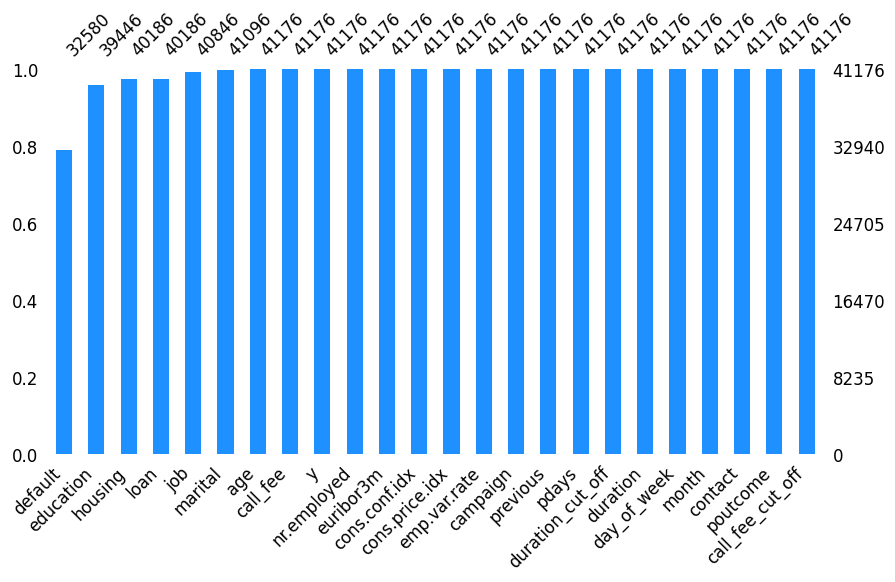

In [57]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

#### **Matriks Plot**

<Axes: >

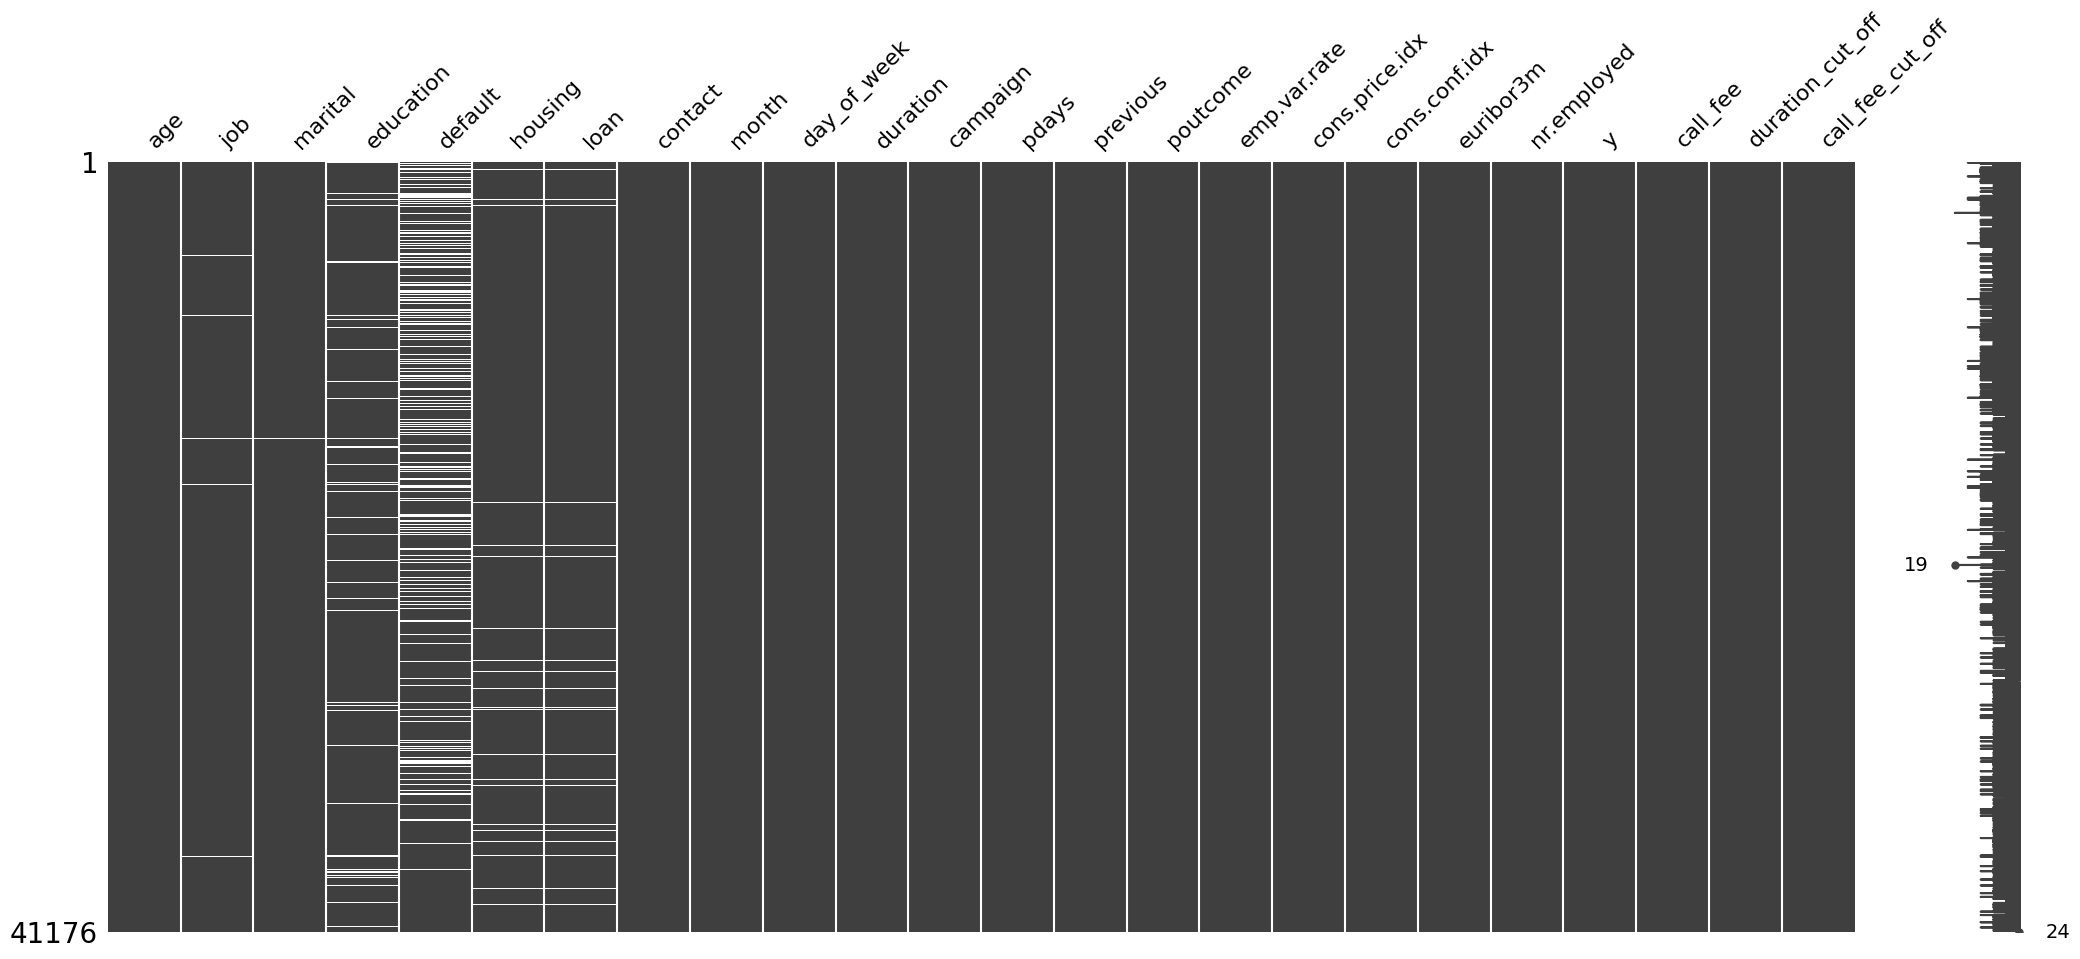

In [58]:
missingno.matrix(df)

#### **Heatmap**
Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

* **-1** - **Korelasi Negatif** yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
* **0** - **Tidak ada korelasi** yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
* **1** - **Korelasi Positif** yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

<Axes: >

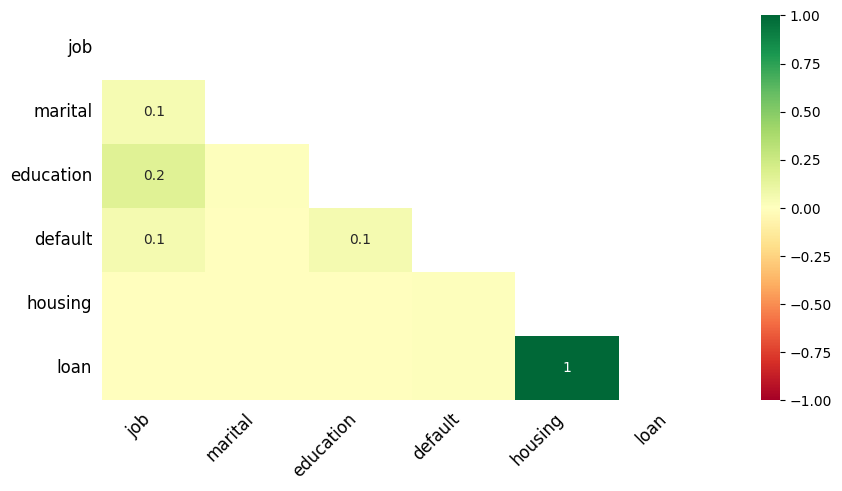

In [59]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

Gambar heatmap di atas menggambarkan **korelasi antar kolom** yang memiliki nilai hilang (`null`) dalam dataset. Visualisasi ini membantu kita memahami apakah ada pola ketergantungan antar kolom yang kosong, yang bisa menjadi dasar strategi imputasi yang lebih tepat.

Beberapa insight penting dari heatmap tersebut:

1. Korelasi tertinggi muncul antara kolom `housing` dan `loan`, dengan nilai **1.0**, yang artinya **jika salah satu kolom missing, maka kolom lainnya juga pasti missing**. Ini menunjukkan hubungan yang sangat erat dan bisa dipertimbangkan untuk diimputasi secara bersamaan atau berdasarkan pola yang sama.

2. Korelasi rendah namun terdeteksi antara:

    1. `education` dan `job` sebesar **0.2**

    2. `education` dan `marital` sebesar **0.1**

    3. `default` dan `education` sebesar **0.1**

    Meskipun rendah, hal ini bisa menjadi pertimbangan tambahan ketika kita menyusun strategi imputasi berdasarkan relasi antar fitur.

3. Fitur seperti `job`, `marital`, dan `default` memiliki nilai korelasi yang sangat rendah antar satu sama lain, menunjukkan bahwa missing value di kolom tersebut terjadi secara **relatif independen**.

Secara keseluruhan, heatmap ini memberikan pemahaman bahwa **beberapa kolom memiliki keterkaitan dalam pola missing value-nya**, dan pendekatan imputasi berdasarkan korelasi ini akan lebih efektif dibandingkan imputasi global tanpa mempertimbangkan hubungan antar fitur.

#### **Dendogram**

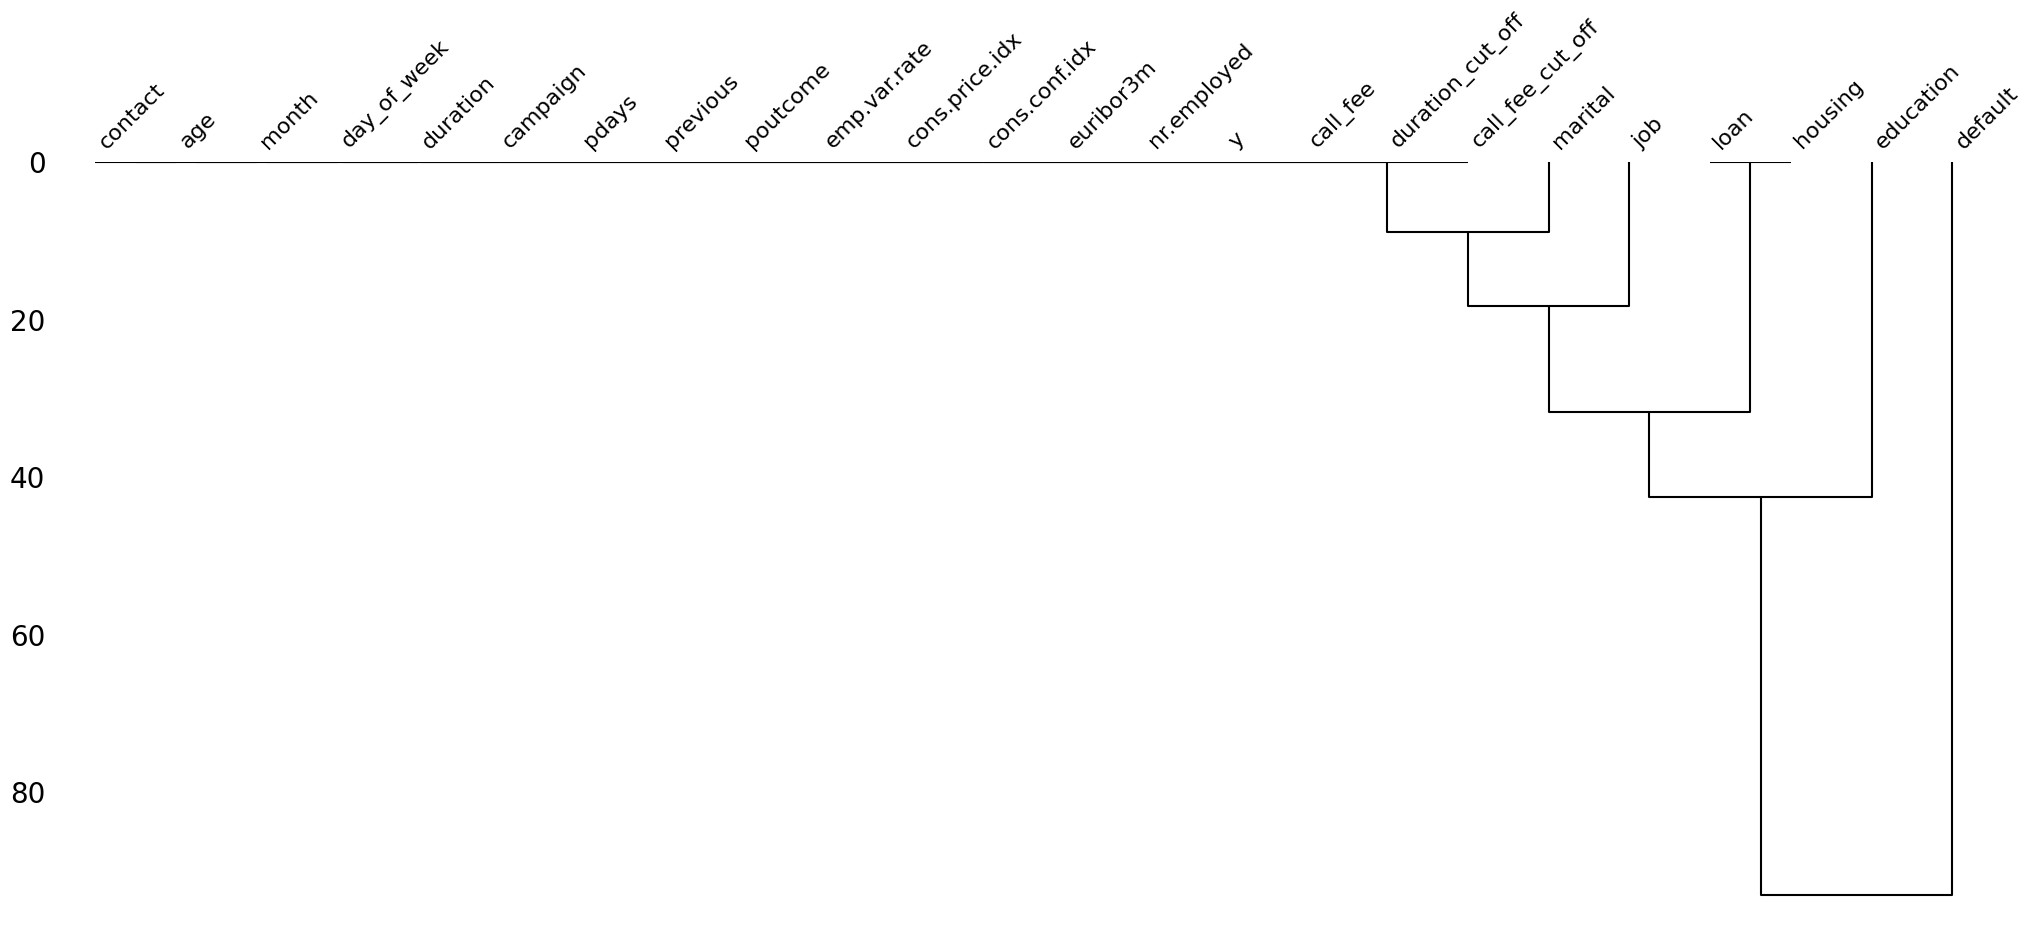

In [60]:
missingno.dendrogram(df)
plt.show()

Visualisasi dendogram di atas memberikan gambaran **struktur hierarki keterkaitan antar kolom** berdasarkan pola missing value yang ada dalam dataset. Dendogram ini berguna untuk mengelompokkan fitur-fitur yang cenderung memiliki pola missing yang **mirip atau terjadi bersamaan**.

Dari hasil dendogram dapat diperhatikan bahwa:

1. Kolom-kolom yang berada dalam **cabang yang sama atau berdekatan**, seperti `job`, `marital`, `loan`, `housing`, `education`, dan `default`, memiliki hubungan keterkaitan dalam hal keberadaan nilai `null`.

2. Kelompok tersebut menunjukkan bahwa **jika sebuah fitur memiliki missing value, fitur lain dalam grup tersebut juga cenderung memiliki missing value**.

3. Hal ini memberikan sinyal bahwa **strategi imputasi bisa dilakukan secara terarah** berdasarkan grup fitur tersebut, bukan secara individual.

Dengan mempertimbangkan hasil dendogram ini, kita akan melakukan **perbaikan nilai null secara bertahap**, dimulai dari fitur yang saling berkaitan secara hierarki, guna menjaga integritas dan konsistensi data.

 **Pembersihan nilai 'unknown' pada kolom 'default'**

In [7]:
df.default.replace('unknown','no',inplace=True)

kita isi kolom 'default' yang memiliki nilai unknown dengan 'no', kita asumsikan bahwa orang yang memiliki nilai 'unknown' memang tidak memiliki kredit macet, selain itu, hal ini juga merupakan alasan yang logis, sebab sebagian besar nasabah di bank memang tidak memiliki kredit macet

 **Pembersihan nilai 'unknown' pada kolom 'job'**

In [8]:
#mengecek distribusi nasabah dengan job 'unknown' berdasarkan pekerjaannya
job_unknown_df = df[df['job'] == 'unknown']
education_distribution = job_unknown_df['education'].value_counts()
print("Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':")
print(education_distribution)

Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':
education
unknown                131
basic.4y                52
university.degree       45
high.school             37
basic.9y                31
basic.6y                22
professional.course     12
Name: count, dtype: int64


In [9]:
basic_education_levels = ['basic.4y', 'basic.6y', 'basic.9y']
basic_education_df = df[df['education'].isin(basic_education_levels)]
basic_education_known_jobs_df = basic_education_df[basic_education_df['job'] != 'unknown']
job_distribution = basic_education_known_jobs_df.groupby('education')['job'].value_counts()
print(job_distribution)

education  job          
basic.4y   blue-collar      2318
           retired           597
           housemaid         474
           entrepreneur      137
           services          132
           unemployed        112
           management        100
           self-employed      93
           admin.             77
           technician         58
           student            26
basic.6y   blue-collar      1426
           services          226
           admin.            151
           technician         87
           management         85
           housemaid          77
           retired            75
           entrepreneur       71
           unemployed         34
           self-employed      25
           student            13
basic.9y   blue-collar      3623
           admin.            499
           services          388
           technician        384
           self-employed     220
           entrepreneur      210
           unemployed        186
           managem

Darisini dapat kita ketahui bahwa seorang nasabah yang memiliki education 'basic' dari 4 year hingga 9 years, kebanyakan bekerja sebagai blue-collar. dari sini dapat kita isi nasabah yang memiliki nilai 'unknown' pada kolom jobnya, dan memiliki education 'basic' 4 year hingga 9 year menjadi sebagai pekerja blue-collar

In [10]:
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'

In [11]:
df.loc[(df['job'] == 'unknown') & (df['education']=='high.school'), 'job'] = 'admin.'
df.loc[(df['job'] == 'unknown') & (df['education']=='university.degree'), 'job'] = 'admin.'

kita lakukan pengisian untuk nasabah yang memiliki education 'university.degree' dan 'high.school' dengan job 'admin', karena lulusan tersebut sebagian besar bekerja sebagai admin 

In [12]:
filtered_df = df[(df['age'] >= 60) & (df['job'] == 'unknown')]
count = len(filtered_df)
print(f"Jumlah nasabah berumur 60 tahun atau lebih dengan pekerjaan 'unknown': {count}")

Jumlah nasabah berumur 60 tahun atau lebih dengan pekerjaan 'unknown': 19


disini kita cek nasabah yang memiliki umur 60 tahun atau lebih, tetapi kolom pekerjaannya bernilai 'unknown'. Terdapat setidaknya 23 nasabah yang berumur 60 tahun atau lebih yang memiliki nilai 'unknown' pada kolom 'jobnya'

In [13]:
age_60_df = df[df['age'] == 60]
age_60_known_jobs_df = age_60_df[age_60_df['job'] != 'unknown']
job_distribution = age_60_known_jobs_df['job'].value_counts()
print("Distribusi pekerjaan untuk nasabah yang berumur 60 tahun:")
print(job_distribution)

Distribusi pekerjaan untuk nasabah yang berumur 60 tahun:
job
retired          107
admin.            62
management        28
blue-collar       25
technician        15
housemaid         13
self-employed     12
entrepreneur       9
services           6
unemployed         3
Name: count, dtype: int64


darisini dapat kita lihat, bahwa seorang nasabah yang memiliki umur 60 tahun atau lebih telah pensiun atau 'retired', sehingga kita dapat mengisi permasalahan diatas tadi dengan menggantinya menjadi 'retired'

In [14]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'

In [15]:
education_level = 'professional.course'
job_status = 'unknown'
filtered_df = df[(df['education'] == education_level) & (df['job'] == job_status)]
count = len(filtered_df)
print(f"Jumlah nasabah dengan pendidikan '{education_level}' dan pekerjaan '{job_status}': {count}")

Jumlah nasabah dengan pendidikan 'professional.course' dan pekerjaan 'unknown': 10


disini kita cek nasabah yang memiliki education 'professional course', tetapi kolom pekerjaannya bernilai 'unknown'. Terdapat setidaknya 23 nasabah yang berumur 60 tahun atau lebih yang memiliki nilai 'unknown' pada kolom 'jobnya'

In [16]:
education_level = 'professional.course'
prof_course_df = df[df['education'] == education_level]
prof_course_known_jobs_df = prof_course_df[prof_course_df['job'] != 'unknown']
job_distribution = prof_course_known_jobs_df['job'].value_counts()
print(f"Distribusi pekerjaan untuk nasabah dengan pendidikan '{education_level}':")
print(job_distribution)

Distribusi pekerjaan untuk nasabah dengan pendidikan 'professional.course':
job
technician       3320
blue-collar       453
admin.            363
retired           243
services          218
self-employed     168
unemployed        142
entrepreneur      135
management         89
housemaid          59
student            43
Name: count, dtype: int64


darisini dapat kita lihat, bahwa seorang nasabah yang memiliki education 'professional course' sebagian besar memiliki pekerjaan sebagai technician, sehingga kita dapat mengisi permasalahan diatas tadi dengan menggantinya menjadi 'technician'

In [17]:
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

sekarang hanya tersisa nasabah yang memiliki job 'unknown' akan tetapi  educationnya juga berisikan 'unknown'. hal ini cukup sulit untuk diisi, karena tidak adanya korelasi terhadap variabel lain, selain itu, data tersebut hanya berisikan sekitaran 117 nasabah saja, akan lebih baik untuk didrop saja

In [18]:
# mendrop nasabah yang memiliki job 'unknown' beserta education 'unknown'
indeks_yang_dihapus = df[(df['job'] == 'unknown') & (df['education'] == 'unknown')].index
df.drop(indeks_yang_dihapus, inplace=True)

In [19]:
job_unknown_df = df[df['job'] == 'unknown']
education_distribution = job_unknown_df['education'].value_counts()
print("Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':")
print(education_distribution)

Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':
Series([], Name: count, dtype: int64)


 **Pembersihan nilai 'unknown' pada kolom 'education'**

In [20]:
unknown_education_df = df[df['education'] == 'unknown']
remaining_count = len(unknown_education_df)
print(f"Jumlah sisa nasabah dengan pendidikan 'unknown': {remaining_count}")
print("\nDistribusi berdasarkan 'Job' (Pekerjaan):")
job_distribution = unknown_education_df['job'].value_counts()
print(job_distribution)


Jumlah sisa nasabah dengan pendidikan 'unknown': 1614

Distribusi berdasarkan 'Job' (Pekerjaan):
job
blue-collar      454
admin.           249
technician       212
student          167
services         150
management       123
retired          112
entrepreneur      57
housemaid         42
self-employed     29
unemployed        19
Name: count, dtype: int64


disini kita lakukan distribusi nasabah yang memiliki education 'unknown' berdasarkan pekerjannya

In [21]:
# Saring data untuk mengecualikan nilai 'unknown'
known_data_df = df[(df['job'] != 'unknown') & (df['education'] != 'unknown')]
distribution_pivot = known_data_df.groupby('education')['job'].value_counts().unstack(fill_value=0)
education_totals = distribution_pivot.sum(axis=1)
sorted_distribution = distribution_pivot.loc[education_totals.sort_values(ascending=False).index]
print("Distribusi Pekerjaan Berdasarkan Tingkat Pendidikan (Diurutkan dari yang Paling Banyak):")
print(sorted_distribution)

Distribusi Pekerjaan Berdasarkan Tingkat Pendidikan (Diurutkan dari yang Paling Banyak):
job                  admin.  blue-collar  entrepreneur  housemaid  management  \
education                                                                       
university.degree      5798           94           610        139        2063   
high.school            3366          878           234        174         298   
basic.9y                499         3654           210         94         166   
professional.course     363          453           135         59          89   
basic.4y                 77         2370           137        474         100   
basic.6y                151         1448            71         77          85   
illiterate                1            8             2          1           0   

job                  retired  self-employed  services  student  technician  \
education                                                                    
university.degree        

darisini terlihat cukup masuk akal untuk mengisi nasabah dengan kolom education 'unknown' yang memiliki pekerjaan sebagai admin, entrepeneur, management, serta employment menjadi university degree, sebagaimana kita lihat diatas bahwa ke 4 pekerjaan tersebut didominasi oleh lulusan university, namun untuk jaga-jaga akan saya batasi pada nasabah yang memiliki umur minimal 20 tahun, karena seorang akan memasuki university setidaknya pada umur tersebut

In [22]:
# mengisi kolom education menjadi university.degree
target_jobs = ['self-employed', 'management', 'entrepreneur', 'admin.']
job_condition = df['job'].isin(target_jobs)
education_condition = df['education'] == 'unknown'
age_condition = df['age'] >= 20
combined_conditions = job_condition & education_condition & age_condition
df.loc[combined_conditions, 'education'] = 'university.degree'
df.loc[(df['job'] == 'unemployed') & (df['education'] == 'unknown'), 'education'] = 'university.degree'

darisini terlihat cukup masuk akal untuk mengisi nasabah dengan kolom education 'unknown' yang memiliki pekerjaan sebagai 'sevices' menjadi highschool, karena pekerjaan tersebut sendiri didominasi oleh nasabah yang memiliki education 'highschool', sehingga akan kita isi menjadi highschool. kemudian kita juga akan mengisi nasabah yang memiliki 'job' sebagai 'unemployed' menjadi university karena unemployed juga didominasi oleh lulusan university

In [23]:
#mengisi kolom education menjadi highschool
job_condition = df['job'] == 'services'
education_condition = df['education'] == 'unknown'
combined_conditions = job_condition & education_condition
df.loc[combined_conditions, 'education'] = 'high.school'

selanjutnya kita lakukan pengisian nasabah yang memiliki education 'unknown' namun bekerja sebagai technician, karena technician didominasi oleh professional.course maka dapat kita asumsikan bahwa nasabah tersebut juga memiliki education professional.course

In [24]:
# mengisi education menjadi professioanl.course 
job_condition = df['job'] == 'technician'
education_condition = df['education'] == 'unknown'
combined_conditions = job_condition & education_condition
df.loc[combined_conditions, 'education'] = 'professional.course'

Kita isi menjadi basic.9y. karena nasabah yang memiliki education tersebut bekerja sebagai blue collar

In [25]:
##mengisi kolom education menjadi basic.9y
df.loc[(df['job'] == 'blue-collar') & (df['education'] == 'unknown'), 'education'] = 'basic.9y'

untuk pengisian yang memiliki 'job' student ini agak sedikit rumit, karena akan kita gunakan umur mereka untuk mengisi kolom 'education' sesuai dengan rata-rata education yang dimiliki oleh nasabah pada rentang umur tersebut

kita akan lakukan pengisian nasabah yang memiliki education 'unknown' namun memiliki job sebagai student dengan menggunakan umurnya, jika umur nasabah tersebut <= 17 tahun maka akan kita isi dengan highschool, mengingat rentang umur highschool berada dikisaran tersebut, kita pilih highschool karena merupakan distribusi terbesar kedua setelah university.degree, jika berumur diatasnya akan kita asumsikan memiliki education university.degree. mengingat pada umur tersebut kemungkinan besar pendidikan yang sedang dijalani hanya ada university.degree

In [26]:
# mengisi nilai unknown menggunakan umurnya untuk menentukan edukasi nasabah
students_known_education = df[(df['job'] == 'student') & (df['education'] != 'unknown')]
def get_imputed_education(age):
    """
    Fungsi ini mengembalikan tingkat pendidikan yang paling mungkin berdasarkan umur mahasiswa.
    """
    if age <= 17:
        return 'high.school'  # Jenjang SMA
    elif age <= 22:
        return 'university.degree' # kita asumsikan berada di rentang S1 -S3
    else:
        # Untuk mahasiswa yang lebih tua, kita gunakan modus dari data referensi
        older_student_mode = students_known_education[students_known_education['age'] > 22]['education'].mode()
        if not older_student_mode.empty:
            return older_student_mode[0]
        else:
            return 'university.degree' # Nilai cadangan jika tidak ada referensi
target_rows_mask = (df['job'] == 'student') & (df['education'] == 'unknown')

imputed_values = df.loc[target_rows_mask, 'age'].apply(get_imputed_education)
df.loc[target_rows_mask, 'education'] = imputed_values
print("Verifikasi setelah imputasi:")
print(f"Jumlah mahasiswa dengan pendidikan 'unknown': {(df[df['job'] == 'student']['education'] == 'unknown').sum()}")

Verifikasi setelah imputasi:
Jumlah mahasiswa dengan pendidikan 'unknown': 0


In [27]:
#mengisi kolom menjadi basic.4y
df.loc[(df['job'] == 'housemaid') & (df['education'] == 'unknown'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'retired') & (df['education'] == 'unknown'), 'education'] = 'basic.4y'

Kita isi nasabah yang memiliki education 'unknown' namun bekerja sebagai housemaid atau 'retired' menjadi basic.4y. karena kita lihat dari data diatas, bahwa orang yang bekerja sebagai housemaid dan 'retired' didominasi oleh pendidikan 'basic.4y'

In [28]:
#kita cek sisa nasabah yang memiliki education 'unknown'
unknown_education_df = df[df['education'] == 'unknown']

remaining_count = len(unknown_education_df)
print(f"Jumlah sisa nasabah dengan pendidikan 'unknown': {remaining_count}")

print("\nDistribusi berdasarkan 'Job' (Pekerjaan):")
job_distribution = unknown_education_df['job'].value_counts()
print(job_distribution)

Jumlah sisa nasabah dengan pendidikan 'unknown': 0

Distribusi berdasarkan 'Job' (Pekerjaan):
Series([], Name: count, dtype: int64)


untuk retired akan kita isi dengan nilai modus saja, yaitu dengan basic.4y. karena data ini cukup membingungkan untuk diisi, tidak ada korelasi yang dapat ditemukan dengan data-data yang ada saat ini

 **Pembersihan nilai 'unknown' pada kolom 'marital'**

In [29]:
#mengecek distribusi nasabah pada kolom 'marital'
marital_distribution = df['marital'].value_counts()

# 2. Cetak hasilnya ke konsol dengan judul yang deskriptif.
print("Distribusi nasabah berdasarkan marital:")
print(marital_distribution)

Distribusi nasabah berdasarkan marital:
marital
married     24830
single      11555
divorced     4611
unknown        75
Name: count, dtype: int64


disini dapat kita ketahui, untuk kolom marital sendiri didominasi dengan 'married', dikarenakan pada kolom marital hanya terdapat 80 yang bernilai 'unknown', jadi dapat kita isi dengan nilai modusnya saja

In [30]:
# mengisi kolom marital dengan modus
marital_mode = df[df['marital'] != 'unknown']['marital'].mode()[0]
df['marital'].replace('unknown', marital_mode, inplace=True)

 **nilai 'unknown' pada kolom 'loan' dan 'housing'**

untuk kolom loan dan housing yang memiliki nilai 'unknown' ini sebenarnya agak cukup tricky, dikarenakan kolom loan dengan nilai 'unknown' juga akan memiliki kolom housing dengan nilai 'unknown' juga, hal ini dapat dilihat menggunakan visualisasi dibawah

Distribusi Kolom 'loan' Berdasarkan 'housing' (Jumlah):
loan        no  unknown   yes
housing                      
no       16022        0  2550
unknown      0      988     0
yes      17829        0  3682

Distribusi Kolom 'loan' Berdasarkan 'housing' (Persentase):
loan        no  unknown    yes
housing                       
no       86.27      0.0  13.73
unknown   0.00    100.0   0.00
yes      82.88      0.0  17.12


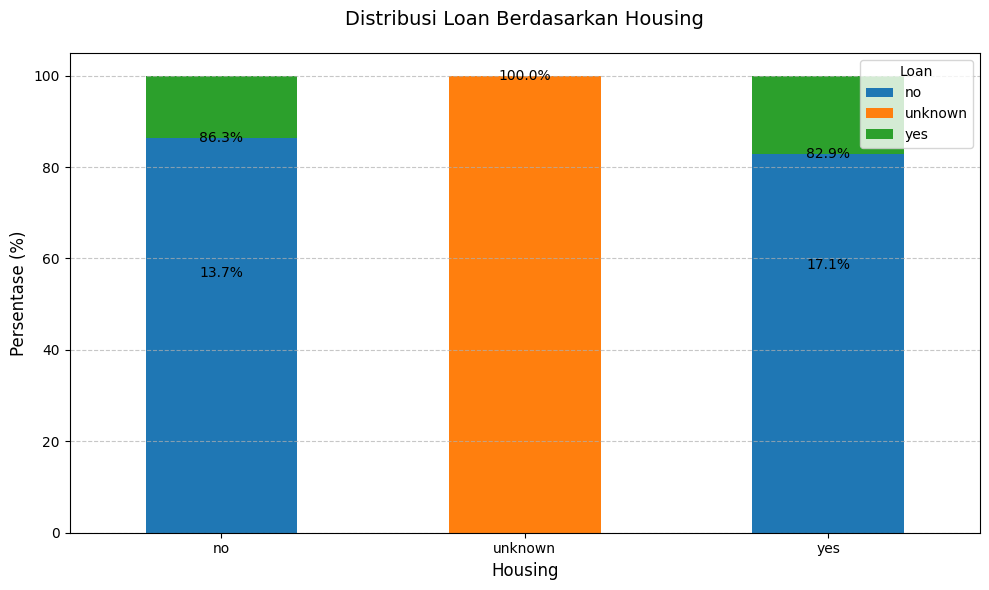

In [31]:
# Menghitung distribusi loan berdasarkan housing
distribusi = pd.crosstab(df['housing'], df['loan'], normalize='index') * 100  # Dalam persentase
distribusi_count = pd.crosstab(df['housing'], df['loan'])  # Dalam jumlah
print("Distribusi Kolom 'loan' Berdasarkan 'housing' (Jumlah):")
print(distribusi_count)
print("\nDistribusi Kolom 'loan' Berdasarkan 'housing' (Persentase):")
print(distribusi.round(2))
plt.figure(figsize=(10, 6))
distribusi.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=plt.gca())
plt.title("Distribusi Loan Berdasarkan Housing", fontsize=14, pad=20)
plt.xlabel("Housing", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)
plt.legend(title="Loan", loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label persentase di atas bar
for i, housing in enumerate(distribusi.index):
    for j, loan in enumerate(distribusi.columns):
        value = distribusi.loc[housing, loan]
        if value > 0:  # Hanya tampilkan label jika nilai > 0
            plt.text(i, distribusi.iloc[i, :j+1].sum() - distribusi.iloc[i, :j].sum()/2, 
                     f'{value:.1f}%', ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [32]:
#menampilkan distribusi nasabah berdasarkan kolom 'loan' dan 'housing']
distribution = df.groupby(['housing', 'loan']).size().reset_index(name='count')
sorted_distribution = distribution.sort_values(by='count', ascending=False)
print(sorted_distribution)

   housing     loan  count
3      yes       no  17829
0       no       no  16022
4      yes      yes   3682
1       no      yes   2550
2  unknown  unknown    988


darisini dapat kita lihat, yang mendominasi distribusinya ada pada nasabah yang memiliki 'housing' yes dan 'loan' no. namun jika mengisi dengan mediannya masih belum dapat dilakukan juga, karena ini masih kurang masuk akal. bagaimana jika kita asumsikan bahwa nasabah yang memiliki 'housing' dan 'loan' unknown, memang tidak pernah meemiliki tanggunggan pada keduanya, hal ini cukup masuk akal sehingga data 'housing' dan 'loan'nya menjadi unknown, karena mereka memang tidak pernah memiliki tanggungan pada 2 hal tersebut

In [33]:
# kita coba tampilkan distribusi nasabah yang memiliki 'housing' yes dan 'loan' no berdasarkan marital, job, dan education
df_cleaned = df[(df['housing'] != 'unknown') & (df['loan'] != 'unknown')]

specific_group_df = df_cleaned[(df_cleaned['housing'] == 'yes') & (df_cleaned['loan'] == 'no')]

print(f"Menganalisa profil nasabah DENGAN KPR dan TANPA Pinjaman.")
print(f"Total nasabah dalam kelompok ini: {len(specific_group_df)}\n")

print("--- Distribusi Berdasarkan Status Pernikahan ---")
print(specific_group_df['marital'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Pekerjaan ---")
print(specific_group_df['job'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Tingkat Pendidikan ---")
print(specific_group_df['education'].value_counts())
print("\n")

Menganalisa profil nasabah DENGAN KPR dan TANPA Pinjaman.
Total nasabah dalam kelompok ini: 17829

--- Distribusi Berdasarkan Status Pernikahan ---
marital
married     10708
single       5115
divorced     2006
Name: count, dtype: int64


--- Distribusi Berdasarkan Pekerjaan ---
job
admin.           4551
blue-collar      3984
technician       3021
services         1701
management       1244
retired           746
entrepreneur      656
self-employed     623
unemployed        462
housemaid         454
student           387
Name: count, dtype: int64


--- Distribusi Berdasarkan Tingkat Pendidikan ---
education
university.degree      5571
high.school            4201
basic.9y               2815
professional.course    2444
basic.4y               1817
basic.6y                973
illiterate                8
Name: count, dtype: int64




In [34]:
# kita coba tampilkan distribusi nasabah yang memiliki 'housing' no dan 'loan' no berdasarkan marital, job, dan education
df_cleaned = df[(df['housing'] != 'unknown') & (df['loan'] != 'unknown')]
specific_group_df = df_cleaned[(df_cleaned['housing'] == 'no') & (df_cleaned['loan'] == 'no')]

print(f"Menganalisa profil nasabah TANPA KPR dan TANPA Pinjaman.")
print(f"Total nasabah dalam kelompok ini: {len(specific_group_df)}\n")

print("--- Distribusi Berdasarkan Status Pernikahan ---")
print(specific_group_df['marital'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Pekerjaan ---")
print(specific_group_df['job'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Tingkat Pendidikan ---")
print(specific_group_df['education'].value_counts())
print("\n")


Menganalisa profil nasabah TANPA KPR dan TANPA Pinjaman.
Total nasabah dalam kelompok ini: 16022

--- Distribusi Berdasarkan Status Pernikahan ---
marital
married     9838
single      4375
divorced    1809
Name: count, dtype: int64


--- Distribusi Berdasarkan Pekerjaan ---
job
admin.           3997
blue-collar      3748
technician       2594
services         1566
management       1170
retired           704
self-employed     563
entrepreneur      558
housemaid         423
unemployed        376
student           323
Name: count, dtype: int64


--- Distribusi Berdasarkan Tingkat Pendidikan ---
education
university.degree      4843
high.school            3867
basic.9y               2577
professional.course    2059
basic.4y               1740
basic.6y                929
illiterate                7
Name: count, dtype: int64




Setelah kita analisa lebih dalam dari kedua distribusi data diatas, dapat kita lihat kedua2nya tidak memiliki perbedaan sama sekali. Keduanya sama-sama didominasi oleh nasabah yang sudah married, bekerja sebagai admin atau blue collar, dan memiliki pendidikan university.degree atau highschool. sekarang coba kita bandingkan dengan nasabah yang memiliki 'housing' dan 'loan' unknown

In [35]:
# menampilkan nasabah yang memiliki 'housing' dan 'loan' unknown
specific_group_df = df[(df['housing'] == 'unknown') & (df['loan'] == 'unknown')]

# Menampilkan analisis untuk kelompok tersebut
print(f"Menganalisa profil nasabah dengan KPR 'unknown' dan Pinjaman 'unknown'.")
print(f"Total nasabah dalam kelompok ini: {len(specific_group_df)}\n")

print("--- Distribusi Berdasarkan Status Pernikahan ---")
print(specific_group_df['marital'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Pekerjaan ---")
print(specific_group_df['job'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Tingkat Pendidikan ---")
print(specific_group_df['education'].value_counts())
print("\n")


Menganalisa profil nasabah dengan KPR 'unknown' dan Pinjaman 'unknown'.
Total nasabah dalam kelompok ini: 988

--- Distribusi Berdasarkan Status Pernikahan ---
marital
married     587
single      280
divorced    121
Name: count, dtype: int64


--- Distribusi Berdasarkan Pekerjaan ---
job
blue-collar      241
admin.           229
technician       147
services         101
management        71
retired           44
self-employed     40
entrepreneur      36
housemaid         29
unemployed        27
student           23
Name: count, dtype: int64


--- Distribusi Berdasarkan Tingkat Pendidikan ---
education
university.degree      287
high.school            225
basic.9y               162
professional.course    132
basic.4y               122
basic.6y                60
Name: count, dtype: int64




setelah kita cek kembali, ternyata yang memiliki nilai unknown, tidak memiliki perbedaan dengan dua distribusi diatas. sebenarnya bisa saja jika kita masukkan nilai unknown dengan menggunakan modus, namun, nilai unknown ini bisa saja dikarenakan kedua nasabah tersebut memang tidak memiliki tanggungan pada 'loan' dan 'housing'. Sebagaimana kita lihat diatas, nasabah yang memiliki 'housing' dan 'loan' no juga hanya berbeda sekitar 1000 orang. sehingga akan kita putuskan untuk mengisinya dengan 'no' pada kedua kolom tersebut

In [36]:
# Mengganti nilai 'unknown' menjadi 'no' pada kolom 'housing' dan 'loan'
df['housing'] = df['housing'].replace({'unknown': 'no'})
df['loan'] = df['loan'].replace({'unknown': 'no'})

In [37]:
#menampilkan distribusi nasabah berdasarkan kolom 'loan' dan 'housing']
distribution = df.groupby(['housing', 'loan']).size().reset_index(name='count')
sorted_distribution = distribution.sort_values(by='count', ascending=False)
print(sorted_distribution)

  housing loan  count
2     yes   no  17829
0      no   no  17010
3     yes  yes   3682
1      no  yes   2550


In [40]:
#kita cek kembali apakah masih terdapat kolom yang memiliki nilai unknown, jika sudah tidak ada akan kita lanjutkan ke progress selanjutnya

unknown_counts = {}
for col in df.columns:
    if 'unknown' in df[col].unique():
        # Jika ada, lakukan penghitungan yang lebih intensif
        count = df[col][df[col] == 'unknown'].count()
        if count > 0:
            # Simpan nama kolom dan jumlahnya
            unknown_counts[col] = count
sorted_unknown_counts = sorted(unknown_counts.items(), key=lambda item: item, reverse=True)
for col, count in sorted_unknown_counts:
    print(f"Kolom '{col}' memiliki {count} nilai 'unknown'.")

penanganan untuk sisa-sisa missing value menggunakan modus

#### **Penyimpanan Data Perubahan¶**

In [94]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-clean.csv**

#### **Pembacaan Ulang DataFrame**

In [95]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,NaN,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


## **Explonatory Data Analys (EDA)**

disini kita akan mencari tau distribusi kalangan nasabah yang melakukan deposito dan tidak berdasarkan beberapa variabel yang berpengaruh

In [96]:
# Pilih kolom-kolom kategorikal yang relevan
kolom_analisis = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome'
]

total_nasabah_deposito = len(df[df['y'] == 'yes'])

for kolom in kolom_analisis:
    print(f"--- Analisis Berdasarkan: {kolom.upper()} ---")
    
    # Group by untuk mendapatkan jumlah 'yes' dan 'no'
    analisis_df = df.groupby(kolom)['y'].value_counts().unstack().fillna(0).astype(int)
    
    # Kolom pct_deposito_internal (%): Persentase deposito di dalam kategori itu sendiri
    analisis_df['pct_deposito_internal (%)'] = (analisis_df['yes'] / (analisis_df['yes'] + analisis_df['no'])) * 100
    
    # Kolom pct_kontribusi_total (%): Persentase kontribusi deposito terhadap total deposito
    analisis_df['pct_kontribusi_total (%)'] = (analisis_df['yes'] / total_nasabah_deposito) * 100
    
    # Tampilkan hasil yang diurutkan berdasarkan persentase konversi internal tertinggi
    display(analisis_df.sort_values(by='pct_deposito_internal (%)', ascending=False))
    print("\n" * 2)

--- Analisis Berdasarkan: JOB ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
job,,,,
student,600,275,31.428571,5.928002
retired,1284,434,25.261932,9.355465
unemployed,870,144,14.201183,3.104117
admin.,9068,1351,12.966695,29.122656
management,2596,328,11.217510,7.070489
technician,6009,730,10.832468,15.736150
self-employed,1272,149,10.485574,3.211899
housemaid,954,106,10.000000,2.284975
entrepreneur,1332,124,8.516484,2.672990





--- Analisis Berdasarkan: MARITAL ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
marital,,,,
single,9944,1620,14.008993,34.921319
divorced,4135,476,10.323140,10.260832
married,22390,2531,10.156093,54.559172





--- Analisis Berdasarkan: EDUCATION ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
education,,,,
illiterate,14,4,22.222222,0.086225
university.degree,10495,1669,13.720816,35.977581
professional.course,4645,595,11.354962,12.826040
high.school,8481,1031,10.838940,22.224617
basic.4y,3748,428,10.249042,9.226126
basic.6y,2103,188,8.206024,4.052598
basic.9y,5572,473,7.824648,10.196163





--- Analisis Berdasarkan: DEFAULT ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
default,,,,
no,28381,4196,12.880253,90.450528
yes,3,0,0.000000,0.000000





--- Analisis Berdasarkan: HOUSING ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
housing,,,,
yes,19064,2507,11.622085,54.041819
no,16590,2025,10.878324,43.651649





--- Analisis Berdasarkan: LOAN ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
loan,,,,
no,30089,3849,11.341269,82.970468
yes,5565,683,10.931498,14.723001





--- Analisis Berdasarkan: CONTACT ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
contact,,,,
cellular,22283,3852,14.738856,83.035137
telephone,14254,787,5.232365,16.964863





--- Analisis Berdasarkan: MONTH ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
month,,,,
3,270,276,50.549451,5.949558
12,93,89,48.901099,1.918517
9,314,256,44.912281,5.518431
10,402,315,43.933054,6.790257
4,2092,539,20.486507,11.618883
8,5521,655,10.605570,14.119422
6,4759,559,10.511470,12.050011
11,3684,416,10.146341,8.967450
7,6521,648,9.038918,13.968528





--- Analisis Berdasarkan: POUTCOME ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
poutcome,,,,
success,479,894,65.112891,19.271395
failure,3647,605,14.228598,13.041604
nonexistent,32411,3140,8.832382,67.687002


In [97]:
# 1. menampilkan distribusi nasabah yang melakukan doposito dan tidak berdasarkan loan dan housing agar mendapatkan analisa yang lebih jelas
df['status_pinjaman'] = 'Housing: ' + df['housing'] + ', Loan: ' + df['loan']
total_nasabah_deposito = len(df[df['y'] == 'yes'])
print("--- Analisis Gabungan Berdasarkan Status Housing & Loan ---")
analisis_df = df.groupby('status_pinjaman')['y'].value_counts().unstack().fillna(0).astype(int)
analisis_df['pct_deposito_internal (%)'] = (analisis_df['yes'] / (analisis_df['yes'] + analisis_df['no'])) * 100
analisis_df['pct_kontribusi_total (%)'] = (analisis_df['yes'] / total_nasabah_deposito) * 100
display(analisis_df.sort_values(by='pct_deposito_internal (%)', ascending=False))

--- Analisis Gabungan Berdasarkan Status Housing & Loan ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
status_pinjaman,,,,
"Housing: yes, Loan: no",15782,2098,11.733781,45.225264
"Housing: yes, Loan: yes",3282,409,11.081008,8.816555
"Housing: no, Loan: no",14307,1751,10.904222,37.745204
"Housing: no, Loan: yes",2283,274,10.715682,5.906445


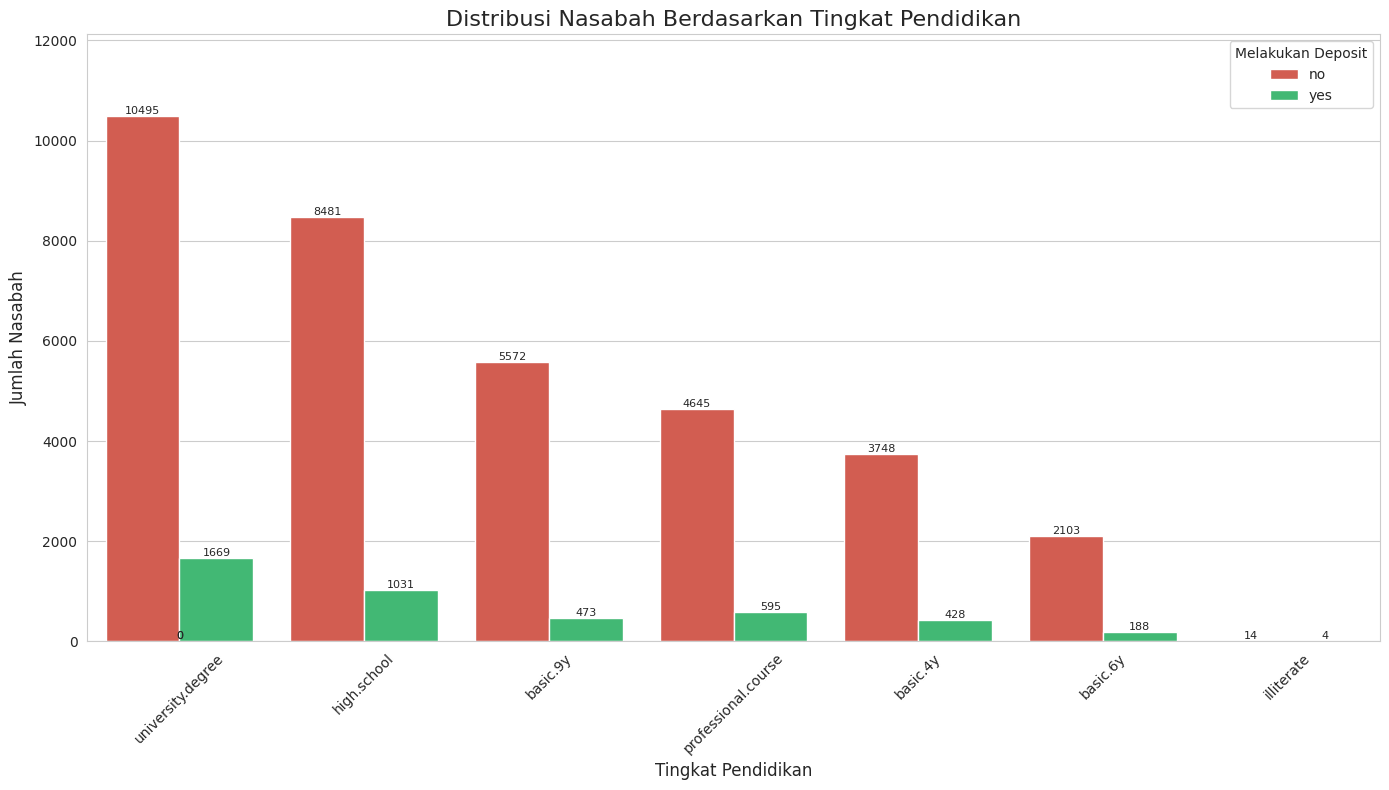

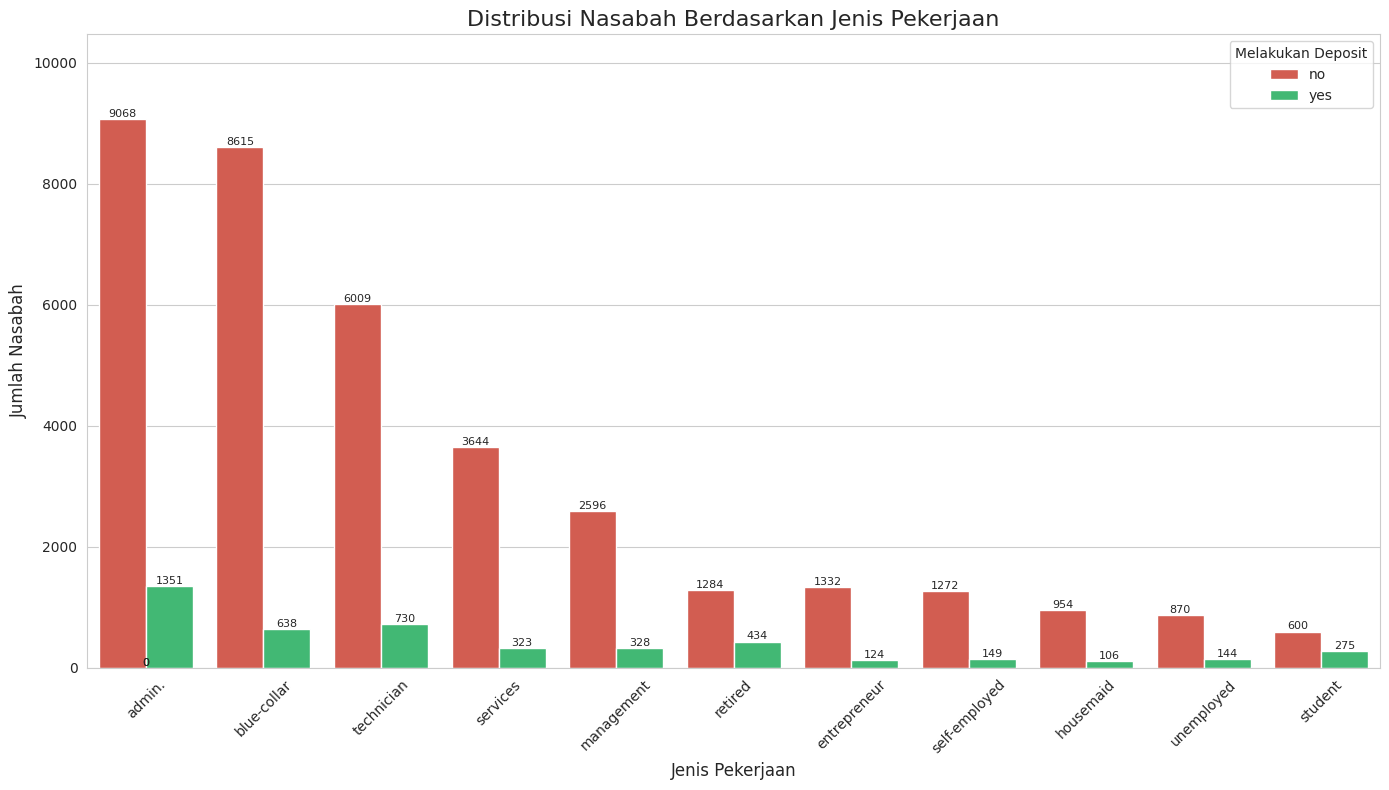

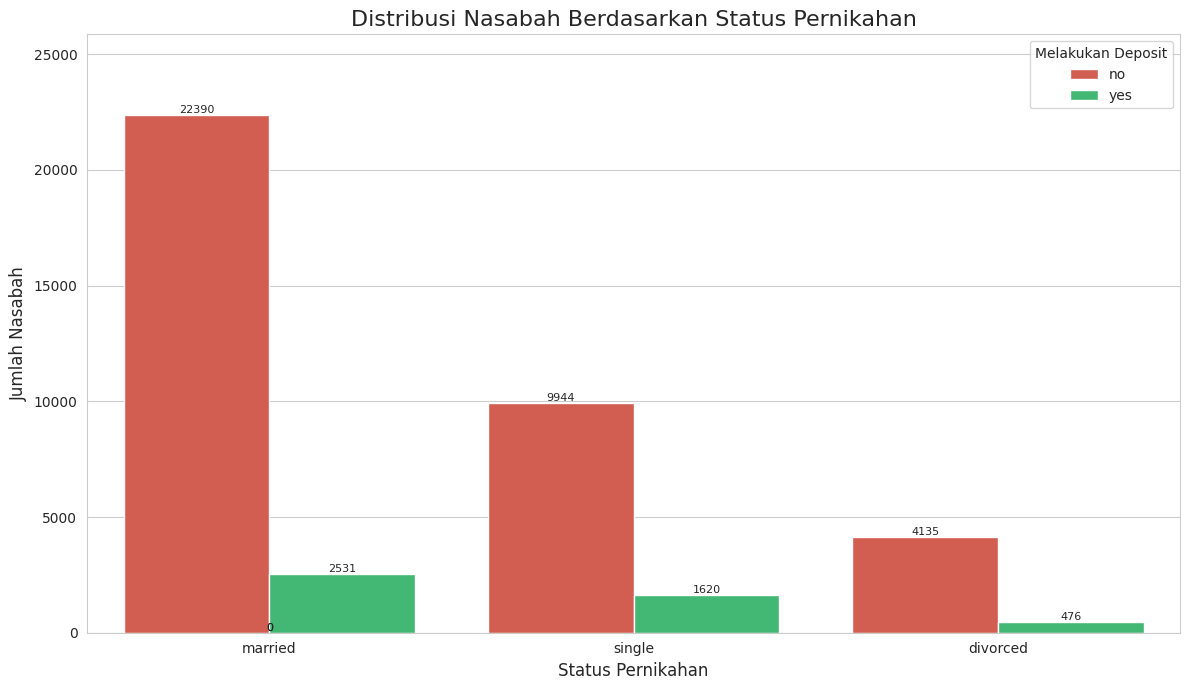

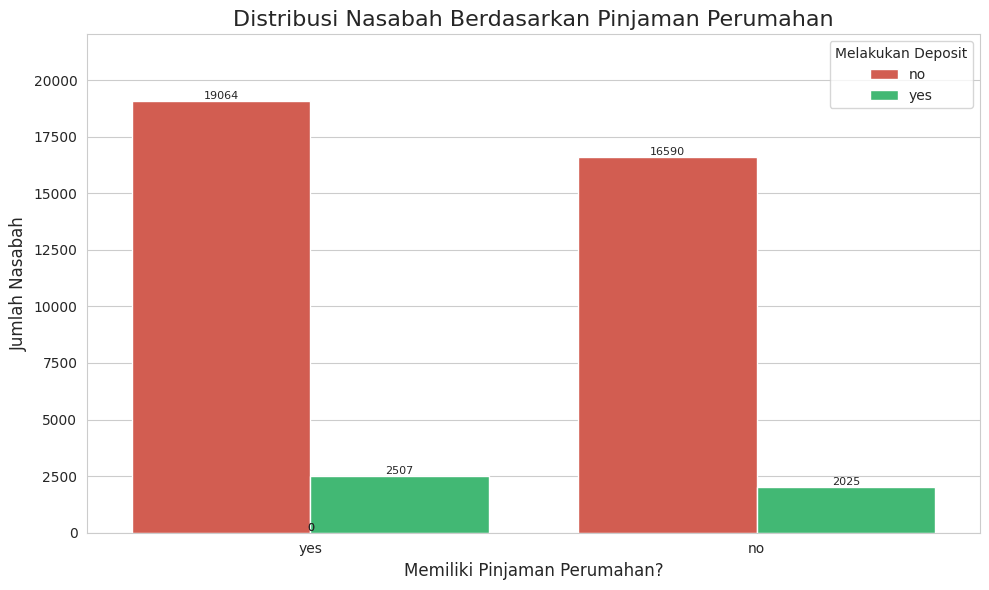

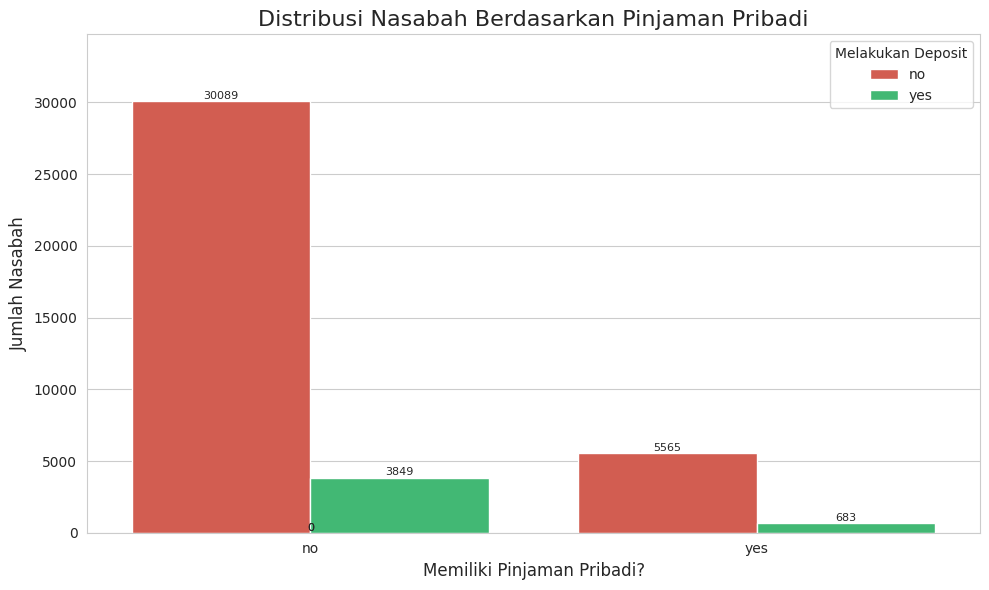

In [98]:
# 2. Pengaturan Umum untuk Visualisasi
sns.set_style("whitegrid")
palette = {"yes": "#2ecc71", "no": "#e74c3c"}

# 3. Fungsi Bantuan untuk Menambahkan Label (Hanya Jumlah)
def add_labels_count_only(ax):
    """Fungsi untuk menambahkan label jumlah saja pada setiap batang."""
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3, # Atur posisi vertikal
                f'{int(height)}', # Tampilkan hanya jumlah (integer)
                ha="center", va="bottom", fontsize=8)

# --- Membuat 5 Plot dengan Label Jumlah Saja ---

# Plot 1: Education
fig1, ax1 = plt.subplots(figsize=(14, 8))
sns.countplot(ax=ax1, data=df, x='education', hue='y', order=df['education'].value_counts().index, palette=palette)
ax1.set_title('Distribusi Nasabah Berdasarkan Tingkat Pendidikan', fontsize=16)
ax1.set_xlabel('Tingkat Pendidikan', fontsize=12)
ax1.set_ylabel('Jumlah Nasabah', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Melakukan Deposit')
add_labels_count_only(ax1)
ax1.set_ylim(0, ax1.get_ylim()[1] * 1.1)
plt.tight_layout()


# Plot 2: Job
fig2, ax2 = plt.subplots(figsize=(14, 8))
sns.countplot(ax=ax2, data=df, x='job', hue='y', order=df['job'].value_counts().index, palette=palette)
ax2.set_title('Distribusi Nasabah Berdasarkan Jenis Pekerjaan', fontsize=16)
ax2.set_xlabel('Jenis Pekerjaan', fontsize=12)
ax2.set_ylabel('Jumlah Nasabah', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Melakukan Deposit')
add_labels_count_only(ax2)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.1)
plt.tight_layout()


# Plot 3: Marital
fig3, ax3 = plt.subplots(figsize=(12, 7))
sns.countplot(ax=ax3, data=df, x='marital', hue='y', order=df['marital'].value_counts().index, palette=palette)
ax3.set_title('Distribusi Nasabah Berdasarkan Status Pernikahan', fontsize=16)
ax3.set_xlabel('Status Pernikahan', fontsize=12)
ax3.set_ylabel('Jumlah Nasabah', fontsize=12)
ax3.legend(title='Melakukan Deposit')
add_labels_count_only(ax3)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.1)
plt.tight_layout()


# Plot 4: Housing
fig4, ax4 = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax4, data=df, x='housing', hue='y', order=df['housing'].value_counts().index, palette=palette)
ax4.set_title('Distribusi Nasabah Berdasarkan Pinjaman Perumahan', fontsize=16)
ax4.set_xlabel('Memiliki Pinjaman Perumahan?', fontsize=12)
ax4.set_ylabel('Jumlah Nasabah', fontsize=12)
ax4.legend(title='Melakukan Deposit')
add_labels_count_only(ax4)
ax4.set_ylim(0, ax4.get_ylim()[1] * 1.1)
plt.tight_layout()


# Plot 5: Loan
fig5, ax5 = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax5, data=df, x='loan', hue='y', order=df['loan'].value_counts().index, palette=palette)
ax5.set_title('Distribusi Nasabah Berdasarkan Pinjaman Pribadi', fontsize=16)
ax5.set_xlabel('Memiliki Pinjaman Pribadi?', fontsize=12)
ax5.set_ylabel('Jumlah Nasabah', fontsize=12)
ax5.legend(title='Melakukan Deposit')
add_labels_count_only(ax5)
ax5.set_ylim(0, ax5.get_ylim()[1] * 1.1)
plt.tight_layout()



dari data diatas terlihat bahwa:
1. jika kita lihat nasabah yang masih menjadi 'student' memiliki proporsi deposito yang paling besar jika dibandingkan jumlah nasabah dari 'student' itu sendiri, namun jika dilihat dari total deposito keseluruhan, nasabah yang bekerja sebagai 'admin' lah yang memiliki porsi deposito yang paling banyak, hal ini wajar saja karena nasabah didominasi dari kalangan 'admin'.
2. nasabah yang berstatus 'single' memiliki potensi deposito yang paling besar hal ini cukup masuk akal dikarenakan seorang yang masih berstatus 'single' memiliki tanggung jawab finansial yang minim, namun jika dilihat dari proporsinya, yang terbesar ialah yang berstatus 'married'.
3. nasabah yang memiliki education 'university.degree' memiliki potensi deposito serta proporsi yang paling besar dibanding yang lain (mengecualikan kalangan illiterated dikarenakan hanya sedikit saja nasabah yang berasal dari kalangan tersebut), hal ini cukup wajar, dikarenakan lulusan universitas sendiri memiliki pendapatan serta kesejahteraan finansial yang lebih tinggi, sesuai dengan artikel ini https://www.aplu.org/our-work/4-policy-and-advocacy/publicuvalues/employment-earnings/
4. nasabah yang memiliki tanggungan 'housing' dan tidak memiliki 'loan' memiliki potensi dan proporsi yang paling tinggi untuk melakukan deposito, hal ini cukup wajar, dikarenakan nasabah hanya memiliki tanggungan 'housing' dan tidak memiliki tanggungan 'loan' otomatis tanggungan yang dimiliki tidak sebesar yang memiliki keduanya
5. bulan ke 5 atau bulan mei menjadi bulan yang banyak porsi nasabah yang melakukan deposito, selain itu pada bulan tersebut juga memiliki jumlah penawaran untuk melakukan deposito yang paling tinggi, hal ini kami asumsikan pada bulan tersebut diadakan program pemasaran besar-besaran, oleh karena itu jumlahnya melonjak tajam, kemudian pada bulan ke menjadi bulan dengan jumlah persentase nasabah melakukan deposito yang paling tinggi

## Data Preparation

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.pipeline import Pipeline

#### **Remove Unused Data**

kita akan melakukan penghapusan kolom 'duration' beserta turunannya seperti 'call_off', 'duration_cut_off', 'month', 'day_of_week' dan 'call_fee_cut_off', karena kolom ini dapat menyebabkan data leakage jika digunakan sebagai fitur untuk model ML. hal ini dapat dilihat dibawah ini

--- Menganalisis Korelasi dengan Target ---
Korelasi fitur numerik dengan target (y):
y                   1.000000
duration_cut_off    0.706906
call_fee_cut_off    0.594780
call_fee            0.422233
duration            0.405297
previous            0.230202
cons.conf.idx       0.054802
month               0.037210
age                 0.030381
day_of_week         0.009993
campaign           -0.066361
cons.price.idx     -0.136134
emp.var.rate       -0.298289
euribor3m          -0.307740
pdays              -0.324948
nr.employed        -0.354669
Name: y, dtype: float64

[PERINGATAN] Fitur berikut memiliki korelasi sangat tinggi dengan target:
Ini adalah indikasi kuat adanya DATA LEAKAGE!
- duration_cut_off: Korelasi = 0.7069
- call_fee_cut_off: Korelasi = 0.5948

--- Menganalisis Feature Importance dengan Model Sederhana ---
Fitur Paling Penting Menurut Model:
             feature  importance
21  duration_cut_off    0.498833
22  call_fee_cut_off    0.252550
10          duration    0.0571

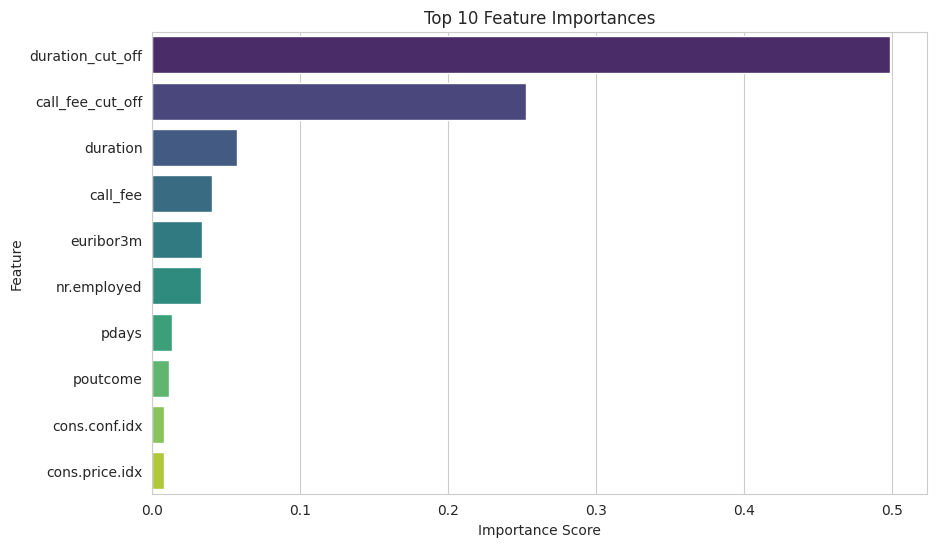

In [100]:
le = LabelEncoder()
df_leakage_check = df.copy()
df_leakage_check['y'] = df_leakage_check['y'].apply(lambda x: 1 if x == 'yes' else 0)
print("--- Menganalisis Korelasi dengan Target ---")
numeric_cols = df_leakage_check.select_dtypes(include=np.number).columns
correlation_with_target = df_leakage_check[numeric_cols].corr()['y'].sort_values(ascending=False)

print("Korelasi fitur numerik dengan target (y):")
print(correlation_with_target)

high_corr_features = correlation_with_target[abs(correlation_with_target) > 0.5]
if not high_corr_features.empty:
    print("\n[PERINGATAN] Fitur berikut memiliki korelasi sangat tinggi dengan target:")
    print("Ini adalah indikasi kuat adanya DATA LEAKAGE!")
    for feature, corr_value in high_corr_features.items():
        if feature != 'y': 
            print(f"- {feature}: Korelasi = {corr_value:.4f}")


print("\n--- Menganalisis Feature Importance dengan Model Sederhana ---")
df_encoded = df_leakage_check.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Fitur Paling Penting Menurut Model:")
print(feature_importances.head(10)) # Tampilkan 10 teratas

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


terlihat disini bahwa kolom 'duration' memiliki korelasi yang cukup kuat dengan keputusan nasabah melakukan deposito atau tidak (kolom 'y' ), sesuai dengan tujuan utama kita, yaitu membangun model machine learning yang dapat memprediksi seorang nasabah akan melakukan deposito sebelum panggilan dilakukan, sehingga otomatis kolom duration akan memyebabkan terjadinya data leakage, alasannya cukup  sederhana, yaitu durasi sendiri belum diketahui ketika model melakukan prediksi. begitu juga dengan kolom turunan duration seperti 'call_off', 'duration_cut_off', dan 'call_fee_cut_off' yang dibuat melalui duration juga

In [42]:
# menghapus kolom duration beserta turunannya
df.drop(columns=['duration', 'call_fee', 'duration_cut_off', 'call_fee_cut_off', 'day_of_week', 'month', 'status_pinjaman'], inplace = True)

KeyError: "['status_pinjaman'] not found in axis"

#### **Feature Encoding**

disini kita akan melakukan features encoding pada beberapa kolom yang nantinya akan digunakan :
1. Yang pertama ialah merubah kolom 'job' menggunakan one hot encoding karena pekerjaan sendiri tidak memiliki tingkatan atau urutan matematis antara 'technician', 'admin', 'blue-collar', dll.
2. merubah kolom 'marital' menggunakan one hot encoding, sama seperti diatas, kolom ini juga tidak memiliki urutan matematis, antara 'single' dan 'married' tidak ada tingkatan tertentu, sehingga model tidak akan menggangap bahwa 'married' lebih besar daripada'single'
3. merubah kolom 'default' menggunakan one hot encoding dikarenakan kolom ini juga tidak memiliki tingkatan atau urutan matematis
4. merubah kolom 'loan' menggunakan one hot encoding dikarenakan kolom ini juga tidak memiliki tingkatan atau urutan matematis
5. merubah kolom 'housing' menggunakan one hot encoding dikarenakan kolom ini juga tidak memiliki tingkatan atau urutan matematis
6. merubah kolom 'contact' menggunakan one hot encoding dikarenakan kolom ini juga tidak memiliki tingkatan atau urutan matematis, sehingga model tidak mengasumsikan bahwa 'telephone' lebih baik atau lebih tinggi dari 'cellular'
7. merubah kolom 'poutcome' menggunakan one hot encoding dikarenakan kolom ini juga tidak memiliki tingkatan atau urutan matematis, sehingga model tidak menggangap bahwa 'success' memiliki nilai 2 kali lipat daripada 'failure'
8. merubah kolom 'education' menggunakan ordinal encoding dikarenakan kolom tersebut memiliki urutan atau tingkatan matematis. secara logika pendidikan 'basic.4y' tentu akan dibawah 'university.degree', sehingga nantinya model tidak mengasumsikan bahwa jenjang pendidikan memiliki nilai yang setara


In [102]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce


In [103]:
education_mapping = [{
        'col': 'education',
        'mapping': {
            'illiterate': 0,
            'basic.4y': 1,
            'basic.6y': 2,
            'basic.9y': 3,
            'high.school': 4,
            'professional.course': 5,
            'university.degree': 6
        }
    }]

In [104]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['job','marital', 'default', 'loan', 'housing', 'contact', 'poutcome']),
    ('ordinal', ce.OrdinalEncoder(mapping= education_mapping), ['education']),
], remainder='passthrough')

In [105]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [106]:
x = df.drop(columns=['y'])
y = df['y']

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

melakukan pembagian dataset untuk model, kita ambil yang paling sering digunakan, yaitu 20& untuk testing dan sisanya untuk training

In [108]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,onehot__job_retired,onehot__job_self-employed,onehot__job_services,onehot__job_student,onehot__job_technician,onehot__job_unemployed,onehot__job_nan,onehot__marital_married,onehot__marital_single,onehot__marital_nan,onehot__default_yes,onehot__default_nan,onehot__loan_yes,onehot__loan_nan,onehot__housing_yes,onehot__housing_nan,onehot__contact_telephone,onehot__poutcome_nonexistent,onehot__poutcome_success,ordinal__education,remainder__age,remainder__campaign,remainder__pdays,remainder__previous,remainder__emp.var.rate,remainder__cons.price.idx,remainder__cons.conf.idx,remainder__euribor3m,remainder__nr.employed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,30.0,2.0,6.0,2.0,-1.8,93.369,-34.8,0.655,5008.7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.0,37.0,3.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,30.0,4.0,999.0,0.0,1.4,93.444,-36.1,4.968,5228.1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,42.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,33.0,4.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1


In [109]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [94]:
models = [dt,rf,xgb,lgbm]
score = []
rata = []
std = []

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)
    ])
    model_cv = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({
    'model': ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'mean_recall': rata,
    'sdev': std
}).set_index('model').sort_values(by='mean_recall', ascending=False)


[LightGBM] [Info] Number of positive: 2968, number of negative: 23384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 457
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112629 -> initscore=-2.064164
[LightGBM] [Info] Start training from score -2.064164
[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 27
[LightGBM] [Info] [bin

,mean_recall,sdev
model,,
Decision Tree,0.334417,0.015912
Random Forest,0.289148,0.015461
XGBoost,0.282140,0.013106
LightGBM,0.266785,0.023365


In [111]:
score_recall = []

def y_pred_func(i):
    """Fungsi ini melatih model dan mengembalikan prediksi."""
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)
    ])
    
    estimator.fit(x_train, y_train)
    return estimator.predict(x_test)

# 2. Iterasi untuk setiap model
for i, j in zip(models, ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']):
    
    # Dapatkan prediksi dari fungsi
    y_pred = y_pred_func(i)
    
    # 3. Hitung recall score dan tambahkan ke list
    # Tidak perlu predict_proba untuk recall
    score_recall.append(recall_score(y_test, y_pred))
    
    # Menampilkan classification report (yang juga berisi recall)
    print(j, '\n', classification_report(y_test, y_pred))

# 4. Buat DataFrame akhir menggunakan recall score
pd.DataFrame({
    'model': ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'recall_score': score_recall
}).set_index('model').sort_values(by='recall_score', ascending=False)

Decision Tree 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7308
           1       0.32      0.35      0.33       928

    accuracy                           0.84      8236
   macro avg       0.62      0.63      0.62      8236
weighted avg       0.85      0.84      0.84      8236

Random Forest 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7308
           1       0.56      0.31      0.40       928

    accuracy                           0.89      8236
   macro avg       0.74      0.64      0.67      8236
weighted avg       0.88      0.89      0.88      8236

XGBoost 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.59      0.27      0.38       928

    accuracy                           0.90      8236
   macro avg       0.75      0.63      0.66      8236
weighted avg       0.88      0.9

,recall_score
model,
Decision Tree,0.354526
Random Forest,0.307112
XGBoost,0.274784
LightGBM,0.272629


In [98]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [99]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [100]:
data = x_train
target = y_train

In [101]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

[LightGBM] [Info] Number of positive: 3339, number of negative: 26307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 29646, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112629 -> initscore=-2.064164
[LightGBM] [Info] Start training from score -2.064164
[LightGBM] [Info] Number of positive: 26307, number of negative: 26307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 52614, number of used features: 27
[LightGBM] [Info] [bi

In [102]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.912298,0.898604,0.873273,0.814654,0.702709,0.657339,0.322552,0.263441,0.761131,0.620253
1,0.913547,0.894961,0.876623,0.781069,0.708895,0.633637,0.333234,0.223720,0.768116,0.588652
2,0.913412,0.904068,0.876126,0.807671,0.707213,0.678021,0.329341,0.293801,0.770848,0.668712
3,0.912973,0.905282,0.876324,0.794310,0.706237,0.673142,0.328743,0.277628,0.764624,0.700680
4,0.912872,0.898604,0.876077,0.799840,0.705951,0.654961,0.328443,0.258760,0.763396,0.619355
5,0.913378,0.900425,0.875143,0.804445,0.707043,0.662331,0.329042,0.269542,0.770687,0.636943
6,0.913277,0.902550,0.875553,0.822339,0.704035,0.655793,0.321557,0.247978,0.778825,0.686567
7,0.913007,0.899211,0.877105,0.793184,0.706631,0.661719,0.329641,0.272237,0.764053,0.619632
8,0.913277,0.897693,0.876014,0.788880,0.706982,0.650038,0.329341,0.250674,0.768693,0.611842
9,0.912804,0.900729,0.875538,0.798140,0.703227,0.669631,0.321557,0.285714,0.770998,0.630952


## Evaluation Metrics Without Oversampling

In [103]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.787756,0.842137,0.887561,0.807844,0.786112,0.693974,0.700080,0.647849,0.848944,0.382540
1,0.788451,0.835155,0.886921,0.785433,0.787106,0.678061,0.708964,0.606469,0.842976,0.361736
2,0.785087,0.849423,0.887573,0.803823,0.783485,0.702716,0.699080,0.652291,0.844314,0.397373
3,0.788375,0.837280,0.887123,0.789319,0.786709,0.681947,0.699992,0.614555,0.850296,0.367150
4,0.787539,0.845173,0.888236,0.793047,0.785576,0.691197,0.691857,0.617251,0.855585,0.383585
5,0.789459,0.843048,0.889244,0.801970,0.787902,0.691943,0.703794,0.633423,0.849305,0.381494
6,0.795009,0.834851,0.888696,0.817189,0.793898,0.686984,0.721584,0.654987,0.845787,0.368741
7,0.791055,0.835762,0.887318,0.794751,0.789614,0.684451,0.708279,0.636119,0.848800,0.367601
8,0.794382,0.840316,0.889216,0.782696,0.793019,0.688398,0.713259,0.630728,0.851393,0.375602
9,0.788242,0.842137,0.889158,0.797431,0.786528,0.690414,0.698624,0.630728,0.851188,0.379254


In [104]:
from imblearn.pipeline import Pipeline
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

In [ ]:
logile

In [ ]:
# Rekomendasi hyperparameter space untuk LightGBM
hyperparam_space = [{
    # Nama model dalam pipeline Anda, contoh: 'model'
    # Jumlah pohon yang akan dibangun.
    'model__n_estimators': [100, 200, 300], 
    
    # Kecepatan belajar model. Nilai kecil butuh n_estimators lebih banyak.
    'model__learning_rate': [0.05, 0.1, 0.2],
    
    # Jumlah daun dalam satu pohon, parameter utama untuk kompleksitas.
    'model__num_leaves': [20, 31, 40, 50],
    
    # Jumlah data minimum dalam satu daun untuk mencegah overfitting.
    'model__min_child_samples': [20, 30, 50],
    
    # Jumlah 'bins' untuk kuantisasi fitur, bisa mempengaruhi akurasi.
    'model__max_bin': [200, 255, 300],
    
    # Untuk memastikan hasil bisa direproduksi.
    'model__random_state': [42]
}]

In [105]:
hyperparam_space_cepat = {
    # Jumlah pohon, rentang dikurangi
    'model__n_estimators': [100, 200],  
    
    # Learning rate tetap penting
    'model__learning_rate': [0.05, 0.1],
    
    # Fokus pada nilai num_leaves yang paling umum dan efektif
    'model__num_leaves': [20, 31, 40],
    
    # Jumlah data minimum dalam daun
    'model__min_child_samples': [20, 50],
    
    # [REKOMENDASI] Tambahkan subsampling untuk kecepatan
    'model__subsample': [0.8, 0.9], # Menggunakan 80% atau 90% data per pohon
    'model__colsample_bytree': [0.8, 0.9], # Menggunakan 80% atau 90% fitur per pohon

    'model__random_state': [42]
    # Parameter max_bin bisa dihilangkan dulu untuk penyederhanaan
}

In [ ]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='recall', cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42))


In [109]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Gunakan hyperparam_space yang sudah disarankan sebelumnya (lebih ringkas)
# hyperparam_space_cepat = { ... }

# Ganti GridSearchCV dengan RandomizedSearchCV
grid = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=hyperparam_space_cepat, # Gunakan 'param_distributions'
    n_iter=5,           # HANYA MENCOBA 30 KOMBINASI ACAK (bisa disesuaikan)
    scoring='recall',
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    random_state=42      # Tambahkan random_state untuk hasil yang konsisten
)

# Untuk menjalankannya:
# random_search.fit(X_train, y_train)

# Untuk melihat parameter terbaik:
# print(random_search.best_params_)

In [ ]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
df = pd.read_csv(output_path, sep=';')
# df['y'] = df['y'].map({'yes': 1, 'no': 0})
# df['default'] = df['default'].map({'yes': 1, 'no': 0})
# df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
# df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
# df['contact'] = df['contact'].map({'telephone': 0, 'cellular': 1})

In [107]:
from datetime import datetime
import time

In [110]:
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
# Fit model
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

# Hasil terbaik
print("Best Recall Score:", grid.best_score_)
print("Best Params:", grid.best_params_)
print("end")
print(f"Waktu eksekusi: {end - start:.2f} detik")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Tanggal dan waktu sekarang: 2025-07-31 11:52:33


/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/ut

[LightGBM] [Info] Number of positive: 29229, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 58458, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Recall Score: 0.6402508477523694
Best Params: {'model__subsample': 0.9, 'model__random_state': 42, 'model__num_leaves': 20, 'model__n_estimators': 100, 'model__min_child_samples': 20, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.9}
end
Waktu eksekusi: 1581.82 detik
Tanggal dan waktu sekarang: 2025-07-31 12:18:55


In [ ]:
# Impor library yang dibutuhkan
import time
from sklearn.model_selection import GridSearchCV
# --- PERUBAHAN DI SINI ---
# Gunakan Pipeline dari imblearn, bukan dari sklearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler
from lightgbm import LGBMClassifier

# Asumsikan variabel-variabel ini sudah ada:
# x_train, y_train = ... (data latih Anda)
# transformer = ... (preprocessor Anda)
# hyperparam_space = ... (hyperparameter Anda)

# --- MEMBUAT PIPELINE YANG BENAR ---
# Pipeline ini sekarang tahu cara menangani RandomOverSampler
pipeline = Pipeline([
    ('preprocess', transformer),
    ('balancing', RandomOverSampler(random_state=42)), # Sampler sekarang bisa digunakan
    ('model', LGBMClassifier()) # Contoh model
])


# Membuat objek GridSearchCV
# Kode Anda selanjutnya tidak perlu diubah
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=hyperparam_space,
    cv=5, # Menggunakan 5-fold CV
    scoring='recall',
    n_jobs=-1
)

# Fit model
print("Mulai mencari hyperparameter terbaik...")
start = time.time()
grid.fit(x_train, y_train)
end = time.time()
print(f"Selesai dalam {end - start:.2f} detik.")

# Hasil terbaik
print("\nHasil Terbaik:")
print(f"Parameter terbaik: {grid.best_params_}")
print(f"Skor recall terbaik: {grid.best_score_:.4f}")

## Feature Importance

In [114]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True).tail(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

NameError: name 'best_model' is not defined

# Conclusion And Recommendation

## Limitasi Model

1. Yang pertama yaitu adalah ketidakseimbangannya kelas (Imbalanced Class) dari datasheet yang kita miliki dapat diketahui bahwa jumlah nasabah yang tidak melakukan deposito atau memiliki nilai 'no' pada kolom 'y' lebih besar daripada nasabah yang melakukan deposito itu sendiri (bernilai 'yes'), sehingga secara alami model akan cenderung lebih baik dalam memprediksi kelas mayoritas (nasabah yang tidak melakukan deposito 'no')
2. Data cenderung statis, dataset ini hanya berisikan sekitaran 1 tahunan saja, dimana kondisi ekonomi dan perilaku nasabah saat data diambil kemungkinan tidak akan sama pada waktu-waktu yang akan datang, sehingga ada kemungkinan bahwa model yang telah dilatih pada saat ini tidak akan seefektif ini pada waktu yang akan datang (terutama waktu bertahun-tahun kemudian) dikarenakan bisa saja akan terjadi pergeseran tren  dimasa mendatang, sehingga model memerlukan pelatihan ulang secara berkala agar model tetap relevan dan parameter terbaik mungkin perlu dicari kembali seiring waktu
3. Karena kita menggunakan Recall, maka dengan kata lain, sama saja kita menebar jaring yang lebih lebar untuk menangkap sebanyak mungkin kasus 'yes'. konsekuensinya adalah kita juga akan menangkap lebih banyak false positives dimana nasabah yang diprediksi akan berkata 'yes' padahal sebenarnya tidak, hal ini akan mengakibatkan dimana tim marketing akan membuang waktu dan biaya untuk orang yang tidak tertarik, namun dilain sisi kita juga akan mengurangi jumlah prospek yang terlewat
4. Model yang kita buat saat ini dilatih berdasarkan dataset di negara Portugal, jika model diterapkan pada negara lain, ada kemungkinan model tidak memiliki kinerja yang baik, hal ini terjadi dikarenakan adanya budaya, kondisi ekonomi serta perilaku yang berbeda

## Model Implementation

model ini diimplemetasikan dengan cara = Pihak perusahaan memberikan dataset pada tim Data Scientist, kemudian akan dibuatkan model Machine Learning yang akan memprediksi seorang nasabah yang memiliki potensi untuk melakukan deposito, model dibangun dengan menggunakan Recall, dengan tujuan agar kita dapat menjaring sebanyak mungkin nasabah potensial, darisitu pihak telemarketing dapat menggunakan model ini, setelah digunakan, model akan memberikan mana saja nasabah-nasabah yang memiliki potensi untuk melakukan deposito sehingga tim telemarketing cukup melakukan panggilan pada nasabah-nasabah yang memiliki potensial saja. Model ini kemungkinan akan mengahabiskan waktu dan uang yang lebih banyak dibandingkan jika kita menggunakan Precision, namun dengan menggunakan model ini, kita akan kehilangan lebih sedikit nasabah potensial daripada jika menggunakan evaluation model lainnya

## Recommendation

Beberapa hal yang mungking dapat dilakukan untuk membuat dan mengembangkan model menjadi lebih baik lagi diantaranya:
1. Menerapkan Penargetan Berjenjang : Maksudnya kita dapat menggunakan skor probabilitas model untuk mengelompokkan nasabah ke dalam tingkatan-tingkatan prioritas tertentu (sebagai contoh Emas, Perak, Perunggu) sehingga memungkinkan tim marketing atau yang terkait untuk membuat alokasi yang lebih cerdas dan efisien
2. Memperkaya Dataset yang ada : maksudnya menambah kolom-kolom dan feature baru yang mungkin saja dapat membuat model memiliki kinerja yang lebih baik (seperti penambahan kolom gaji dan sebagainya)
3. Melakukan pemantauan dan pelatihan ulang model secara berkala, hal ini bertujuan untuk mencegah terjadinya penurunan model yang disebabkan terjadinya perubahan tren atau perilaku pasar seiring berjalannya waktu
4. Mencoba Model Machine Learning dan hypermarater tuning yang lain, agar mengetahui kinerja dari model-model lainnya sehingga kita dapat membuat model yang lebih baik untuk masa mendatang